## Trainee : AbdalRhman Gameel Ahmed Hebishy (G5)

In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--j3p-content-font-size4);
    background-color:#FFA500  ;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}


</style>
''')   

## Import Libararies :

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.graph_objs import *
import plotly.express as px 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# load the datasets & Merge them :

data1=pd.read_csv("loan_info - loan_info.csv")
data2=pd.read_csv("customers_info - customers_info.csv")
data3=pd.read_csv("labels - labels.csv")
print(data1.head())
print(data2.head())
print(data3.head())


   CUSTOMER_ID  ACCOUNT_NUMBER                                 PROGRAM_NAME  \
0            1               1       Auto Loans 50% Down Payment - Employed   
1            2               2                     Pick Up and Small Trucks   
2            3               3       Auto Loans 40% Down Payment - Employed   
3            4               4  Auto Loans 30% Down Payment - Self Employed   
4            5               5  Auto Loans 30% Down Payment - Self Employed   

  LOAN_OPEN_DATE EXPECTED_CLOSE_DATE  ORIGINAL_BOOKED_AMOUNT    CAR_TYPE  
0     11/25/2015           11/3/2020                 91000.0         KIA  
1      12/8/2015           12/3/2017                 35000.0       CARRY  
2      1/12/2016            1/3/2021                 52500.0   CHEVROLET  
3     11/23/2015           10/3/2019                103000.0  MITSUBISHI  
4     11/23/2015           11/3/2018                 94250.0        SEAT  
   CUSTOMER_ID SEX CUSTOMER_OPEN_DATE  BIRTH_DATE  PROFESSION
0            

In [4]:
merged_data1_data2 = pd.merge(data1, data2, on='CUSTOMER_ID', how='inner')  
df = pd.merge(merged_data1_data2, data3, on='CUSTOMER_ID', how='inner')  
print("\nFirst few rows of the final merged dataframe:")
print(df.head())


First few rows of the final merged dataframe:
   CUSTOMER_ID  ACCOUNT_NUMBER_x                                 PROGRAM_NAME  \
0            1                 1       Auto Loans 50% Down Payment - Employed   
1            2                 2                     Pick Up and Small Trucks   
2            3                 3       Auto Loans 40% Down Payment - Employed   
3            4                 4  Auto Loans 30% Down Payment - Self Employed   
4            5                 5  Auto Loans 30% Down Payment - Self Employed   

  LOAN_OPEN_DATE EXPECTED_CLOSE_DATE  ORIGINAL_BOOKED_AMOUNT    CAR_TYPE SEX  \
0     11/25/2015           11/3/2020                 91000.0         KIA   M   
1      12/8/2015           12/3/2017                 35000.0       CARRY   M   
2      1/12/2016            1/3/2021                 52500.0   CHEVROLET   F   
3     11/23/2015           10/3/2019                103000.0  MITSUBISHI   M   
4     11/23/2015           11/3/2018                 94250.0      

In [5]:
df.head()

,CUSTOMER_ID,ACCOUNT_NUMBER_x,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,Unnamed: 0,ACCOUNT_NUMBER_y,label
0,1,1,Auto Loans 50% Down Payment - Employed,11/25/2015,11/3/2020,91000.0,KIA,M,2015-10-27,1986-03-24,EMPLOYEE,0,1,0
1,2,2,Pick Up and Small Trucks,12/8/2015,12/3/2017,35000.0,CARRY,M,2015-11-29,1985-08-18,EMPLOYEE,1,2,0
2,3,3,Auto Loans 40% Down Payment - Employed,1/12/2016,1/3/2021,52500.0,CHEVROLET,F,2015-12-28,1985-07-02,HOUSEWIFE,2,3,0
3,4,4,Auto Loans 30% Down Payment - Self Employed,11/23/2015,10/3/2019,103000.0,MITSUBISHI,M,2015-10-21,1979-01-01,Shop Owner,3,4,0
4,5,5,Auto Loans 30% Down Payment - Self Employed,11/23/2015,11/3/2018,94250.0,SEAT,M,2015-11-02,1977-01-20,Shop Owner,4,5,0


In [6]:
df.drop(columns="Unnamed: 0",axis=1)

,CUSTOMER_ID,ACCOUNT_NUMBER_x,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,ACCOUNT_NUMBER_y,label
0,1,1,Auto Loans 50% Down Payment - Employed,11/25/2015,11/3/2020,91000.0,KIA,M,2015-10-27,1986-03-24,EMPLOYEE,1,0
1,2,2,Pick Up and Small Trucks,12/8/2015,12/3/2017,35000.0,CARRY,M,2015-11-29,1985-08-18,EMPLOYEE,2,0
2,3,3,Auto Loans 40% Down Payment - Employed,1/12/2016,1/3/2021,52500.0,CHEVROLET,F,2015-12-28,1985-07-02,HOUSEWIFE,3,0
3,4,4,Auto Loans 30% Down Payment - Self Employed,11/23/2015,10/3/2019,103000.0,MITSUBISHI,M,2015-10-21,1979-01-01,Shop Owner,4,0
4,5,5,Auto Loans 30% Down Payment - Self Employed,11/23/2015,11/3/2018,94250.0,SEAT,M,2015-11-02,1977-01-20,Shop Owner,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62313,38392,39592,Auto Loans 50% Down Payment - Employed,8/27/2019,9/3/2024,161700.0,GELY,F,2019-08-05,1989-01-01,EMPLOYEE,39592,0
62314,38393,39593,Auto Loans 50% Down Payment - Employed,8/20/2019,8/3/2026,NaN,FIAT,F,2019-08-06,1967-08-27,Accountant - Employee,39593,0
62315,38394,39595,Auto Loans 50% Down Payment - Employed,8/7/2019,7/3/2023,85000.0,BYD,M,2019-08-04,1993-03-03,EMPLOYEE,39595,0
62316,38395,39596,Auto Loans 50% Down Payment - Employed,8/28/2019,8/3/2024,147000.0,HYUNDAI,M,2019-08-18,1996-11-18,EMPLOYEE,39596,0


In [7]:
#get info about the dataset:
print(df.info())

print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset1 -->>",np.shape(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62318 entries, 0 to 62317
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUSTOMER_ID             62318 non-null  int64  
 1   ACCOUNT_NUMBER_x        62318 non-null  int64  
 2   PROGRAM_NAME            62318 non-null  object 
 3   LOAN_OPEN_DATE          62318 non-null  object 
 4   EXPECTED_CLOSE_DATE     62318 non-null  object 
 5   ORIGINAL_BOOKED_AMOUNT  62310 non-null  float64
 6   CAR_TYPE                56786 non-null  object 
 7   SEX                     41025 non-null  object 
 8   CUSTOMER_OPEN_DATE      62318 non-null  object 
 9   BIRTH_DATE              41024 non-null  object 
 10  PROFESSION              40984 non-null  object 
 11  Unnamed: 0              62318 non-null  int64  
 12  ACCOUNT_NUMBER_y        62318 non-null  int64  
 13  label                   62318 non-null  int64  
dtypes: float64(1), int64(5), object(8)
mem

## understanfd the data :

In [8]:
#get the statistical:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,62318.0,12575.001926,12741.454222,1.0,12.0,9106.5,23590.75,38396.0
ACCOUNT_NUMBER_x,62318.0,19423.819715,11583.171841,1.0,8872.0,19067.5,31182.00,39597.0
ORIGINAL_BOOKED_AMOUNT,62310.0,113114.273337,77961.719156,15000.0,64000.0,93500.0,150500.00,2000000.0
Unnamed: 0,62318.0,16889.445698,11035.312379,0.0,7602.0,15813.5,24933.00,39596.0
ACCOUNT_NUMBER_y,62318.0,16890.445698,11035.312379,1.0,7603.0,15814.5,24934.00,39597.0
label,62318.0,0.531740,0.498996,0.0,0.0,1.0,1.00,1.0


In [9]:
# get Types of dataset:
df.dtypes


CUSTOMER_ID                 int64
ACCOUNT_NUMBER_x            int64
PROGRAM_NAME               object
LOAN_OPEN_DATE             object
EXPECTED_CLOSE_DATE        object
ORIGINAL_BOOKED_AMOUNT    float64
CAR_TYPE                   object
SEX                        object
CUSTOMER_OPEN_DATE         object
BIRTH_DATE                 object
PROFESSION                 object
Unnamed: 0                  int64
ACCOUNT_NUMBER_y            int64
label                       int64
dtype: object

In [10]:
# know the number of every item in every column:

for col in df.columns:
    print(f"counts of items in {col} -->> \n {df[col].value_counts()}")
    print("-"*25)

counts of items in CUSTOMER_ID -->> 
 CUSTOMER_ID
12       20600
298        256
36691      225
174        121
1093        49
         ...  
13046        1
13047        1
13048        1
13049        1
38396        1
Name: count, Length: 38396, dtype: int64
-------------------------
counts of items in ACCOUNT_NUMBER_x -->> 
 ACCOUNT_NUMBER_x
32396    100
31096    100
21301    100
21878    100
22214    100
        ... 
13229      1
13230      1
13231      1
13232      1
39597      1
Name: count, Length: 39597, dtype: int64
-------------------------
counts of items in PROGRAM_NAME -->> 
 PROGRAM_NAME
Auto Loans Corporate Guarantee                                    21294
Auto Loans 50% Down Payment - Employed                            10395
Auto Loans 50% Down Payment - Self Employed                       10048
Auto Loans 30% Down Payment - Employed                             6073
Auto Loans 40% Down Payment - Employed                             5113
Auto Loans 40% Down Payment - Self E

In [11]:
# to know the uniques values in evey column in the dataset:

for col in df.columns:
    print(f"All items in the ---->>>{col} column  :  \n{df[col].unique()}")
    print("*"*50)

All items in the ---->>>CUSTOMER_ID column  :  
[    1     2     3 ... 38394 38395 38396]
**************************************************
All items in the ---->>>ACCOUNT_NUMBER_x column  :  
[    1     2     3 ... 39595 39596 39597]
**************************************************
All items in the ---->>>PROGRAM_NAME column  :  
['Auto Loans 50% Down Payment - Employed' 'Pick Up and Small Trucks'
 'Auto Loans 40% Down Payment - Employed'
 'Auto Loans 30% Down Payment - Self Employed'
 'Auto Loans 40% Down Payment - Self Employed'
 'Auto Loans 20% Down Payment - Employed'
 'Auto Loans 30% Down Payment - Employed' 'Auto Loans Corporate Guarantee'
 'Auto Loans 50% Down Payment - Self Employed' 'Auto Loans Special Deals'
 'Auto Loans Payroll Clients' 'Auto Loans Secured against CD'
 'Auto Loans Doctors - Employed' 'Auto Loans Fully Secured'
 'Auto Loans Doctors - Self Employed'
 'Auto Loans 20% Down Payment - Self Employed'
 'Auto Loans 50% Down Payment No Car Prohibition - Self Emplo

## Cleaning :

In [12]:
#check if there null values in data:
# There Null values 

df.isna().mean()

CUSTOMER_ID               0.000000
ACCOUNT_NUMBER_x          0.000000
PROGRAM_NAME              0.000000
LOAN_OPEN_DATE            0.000000
EXPECTED_CLOSE_DATE       0.000000
ORIGINAL_BOOKED_AMOUNT    0.000128
CAR_TYPE                  0.088770
SEX                       0.341683
CUSTOMER_OPEN_DATE        0.000000
BIRTH_DATE                0.341699
PROFESSION                0.342341
Unnamed: 0                0.000000
ACCOUNT_NUMBER_y          0.000000
label                     0.000000
dtype: float64

In [13]:
# Cleaning the Object or Categorical Features from the Null Values :

for col in df.select_dtypes("object").columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    imputed_values = imputer.fit_transform(df[col].values.reshape(-1, 1))
    df[col] = np.squeeze(imputed_values)
df

,CUSTOMER_ID,ACCOUNT_NUMBER_x,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,Unnamed: 0,ACCOUNT_NUMBER_y,label
0,1,1,Auto Loans 50% Down Payment - Employed,11/25/2015,11/3/2020,91000.0,KIA,M,2015-10-27,1986-03-24,EMPLOYEE,0,1,0
1,2,2,Pick Up and Small Trucks,12/8/2015,12/3/2017,35000.0,CARRY,M,2015-11-29,1985-08-18,EMPLOYEE,1,2,0
2,3,3,Auto Loans 40% Down Payment - Employed,1/12/2016,1/3/2021,52500.0,CHEVROLET,F,2015-12-28,1985-07-02,HOUSEWIFE,2,3,0
3,4,4,Auto Loans 30% Down Payment - Self Employed,11/23/2015,10/3/2019,103000.0,MITSUBISHI,M,2015-10-21,1979-01-01,Shop Owner,3,4,0
4,5,5,Auto Loans 30% Down Payment - Self Employed,11/23/2015,11/3/2018,94250.0,SEAT,M,2015-11-02,1977-01-20,Shop Owner,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62313,38392,39592,Auto Loans 50% Down Payment - Employed,8/27/2019,9/3/2024,161700.0,GELY,F,2019-08-05,1989-01-01,EMPLOYEE,39591,39592,0
62314,38393,39593,Auto Loans 50% Down Payment - Employed,8/20/2019,8/3/2026,NaN,FIAT,F,2019-08-06,1967-08-27,Accountant - Employee,39592,39593,0
62315,38394,39595,Auto Loans 50% Down Payment - Employed,8/7/2019,7/3/2023,85000.0,BYD,M,2019-08-04,1993-03-03,EMPLOYEE,39594,39595,0
62316,38395,39596,Auto Loans 50% Down Payment - Employed,8/28/2019,8/3/2024,147000.0,HYUNDAI,M,2019-08-18,1996-11-18,EMPLOYEE,39595,39596,0


In [14]:
# Cleaning the Numerical or Categorical Features from the Null Values :

for col in df.select_dtypes("number").columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    imputed_values = imputer.fit_transform(df[col].values.reshape(-1, 1))
    df[col] = np.squeeze(imputed_values)
df

,CUSTOMER_ID,ACCOUNT_NUMBER_x,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,Unnamed: 0,ACCOUNT_NUMBER_y,label
0,1.0,1.0,Auto Loans 50% Down Payment - Employed,11/25/2015,11/3/2020,91000.0,KIA,M,2015-10-27,1986-03-24,EMPLOYEE,0.0,1.0,0.0
1,2.0,2.0,Pick Up and Small Trucks,12/8/2015,12/3/2017,35000.0,CARRY,M,2015-11-29,1985-08-18,EMPLOYEE,1.0,2.0,0.0
2,3.0,3.0,Auto Loans 40% Down Payment - Employed,1/12/2016,1/3/2021,52500.0,CHEVROLET,F,2015-12-28,1985-07-02,HOUSEWIFE,2.0,3.0,0.0
3,4.0,4.0,Auto Loans 30% Down Payment - Self Employed,11/23/2015,10/3/2019,103000.0,MITSUBISHI,M,2015-10-21,1979-01-01,Shop Owner,3.0,4.0,0.0
4,5.0,5.0,Auto Loans 30% Down Payment - Self Employed,11/23/2015,11/3/2018,94250.0,SEAT,M,2015-11-02,1977-01-20,Shop Owner,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62313,38392.0,39592.0,Auto Loans 50% Down Payment - Employed,8/27/2019,9/3/2024,161700.0,GELY,F,2019-08-05,1989-01-01,EMPLOYEE,39591.0,39592.0,0.0
62314,38393.0,39593.0,Auto Loans 50% Down Payment - Employed,8/20/2019,8/3/2026,93500.0,FIAT,F,2019-08-06,1967-08-27,Accountant - Employee,39592.0,39593.0,0.0
62315,38394.0,39595.0,Auto Loans 50% Down Payment - Employed,8/7/2019,7/3/2023,85000.0,BYD,M,2019-08-04,1993-03-03,EMPLOYEE,39594.0,39595.0,0.0
62316,38395.0,39596.0,Auto Loans 50% Down Payment - Employed,8/28/2019,8/3/2024,147000.0,HYUNDAI,M,2019-08-18,1996-11-18,EMPLOYEE,39595.0,39596.0,0.0


In [15]:
# Here i will Check again the Null Values :
# we see that there NO any Null Values Any more

df.isna().sum()

CUSTOMER_ID               0
ACCOUNT_NUMBER_x          0
PROGRAM_NAME              0
LOAN_OPEN_DATE            0
EXPECTED_CLOSE_DATE       0
ORIGINAL_BOOKED_AMOUNT    0
CAR_TYPE                  0
SEX                       0
CUSTOMER_OPEN_DATE        0
BIRTH_DATE                0
PROFESSION                0
Unnamed: 0                0
ACCOUNT_NUMBER_y          0
label                     0
dtype: int64

In [16]:
# Check if there are aduplicated values in the data & drop it if found :

duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  0
Number of duplicates of cleaning it ----->>>  0


In [17]:
# Extract all Types of columns ffom the data :
for col in df.columns:
    obj_cols=df.select_dtypes("object").columns
    num_cols=df.select_dtypes("number").columns
    disc_cols=df.select_dtypes(include=("int64")).columns
    conts_cols=df.select_dtypes(include=("float64")).columns
    Nomial_cols=df.nunique()[df.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['PROGRAM_NAME', 'LOAN_OPEN_DATE', 'EXPECTED_CLOSE_DATE', 'CAR_TYPE',
       'SEX', 'CUSTOMER_OPEN_DATE', 'BIRTH_DATE', 'PROFESSION'],
      dtype='object')
 Numerical_columns ----->>> Index(['CUSTOMER_ID', 'ACCOUNT_NUMBER_x', 'ORIGINAL_BOOKED_AMOUNT',
       'Unnamed: 0', 'ACCOUNT_NUMBER_y', 'label'],
      dtype='object') 
 Discrete_columns ---->>> Index([], dtype='object') 
 Continous_cols ----->> Index(['CUSTOMER_ID', 'ACCOUNT_NUMBER_x', 'ORIGINAL_BOOKED_AMOUNT',
       'Unnamed: 0', 'ACCOUNT_NUMBER_y', 'label'],
      dtype='object') 
 Nominal Columns --->> SEX      2
label    2
dtype: int64


In [18]:
# Describe object :
df.describe(include="O").T

,count,unique,top,freq
PROGRAM_NAME,62318,24,Auto Loans Corporate Guarantee,21294
LOAN_OPEN_DATE,62318,2097,9/18/2017,915
EXPECTED_CLOSE_DATE,62318,277,7/28/2021,2000
CAR_TYPE,62318,60,HYUNDAI,17204
SEX,62318,2,M,51064
CUSTOMER_OPEN_DATE,62318,3094,2000-11-03,20601
BIRTH_DATE,62318,12966,1989-01-01,21353
PROFESSION,62318,51,EMPLOYEE,32143


## Defination Outliers

In [19]:
# found many feature contain the outliers  :
features=df.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=df[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in df[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in CUSTOMER_ID feature
Q1 of CUSTOMER_ID --->>> 12.0 
 Q3 of CUSTOMER_ID ---->>> 23590.75 
 iqr--->>23578.75
 low_limit--->>>-35356.125 
  upper_limit--->>> 58958.875 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in ACCOUNT_NUMBER_x feature
Q1 of ACCOUNT_NUMBER_x --->>> 8872.0 
 Q3 of ACCOUNT_NUMBER_x ---->>> 31182.0 
 iqr--->>22310.0
 low_limit--->>>-24593.0 
  upper_limit--->>> 64647.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
Ther outlier in this feature ORIGINAL_BOOKED_AMOUNT
Q1 of ORIGINAL_BOOKED_AMOUNT --->>> 64000.0 
 Q3 of ORIGINAL_BOOKED_AMOUNT ---->>> 150500.0 
 iqr--->>86500.0
 low_limit--->>>-65750.0 
  upper_limit--->>> 280250.0 
 outlier---->>> [600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000.0, 600000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


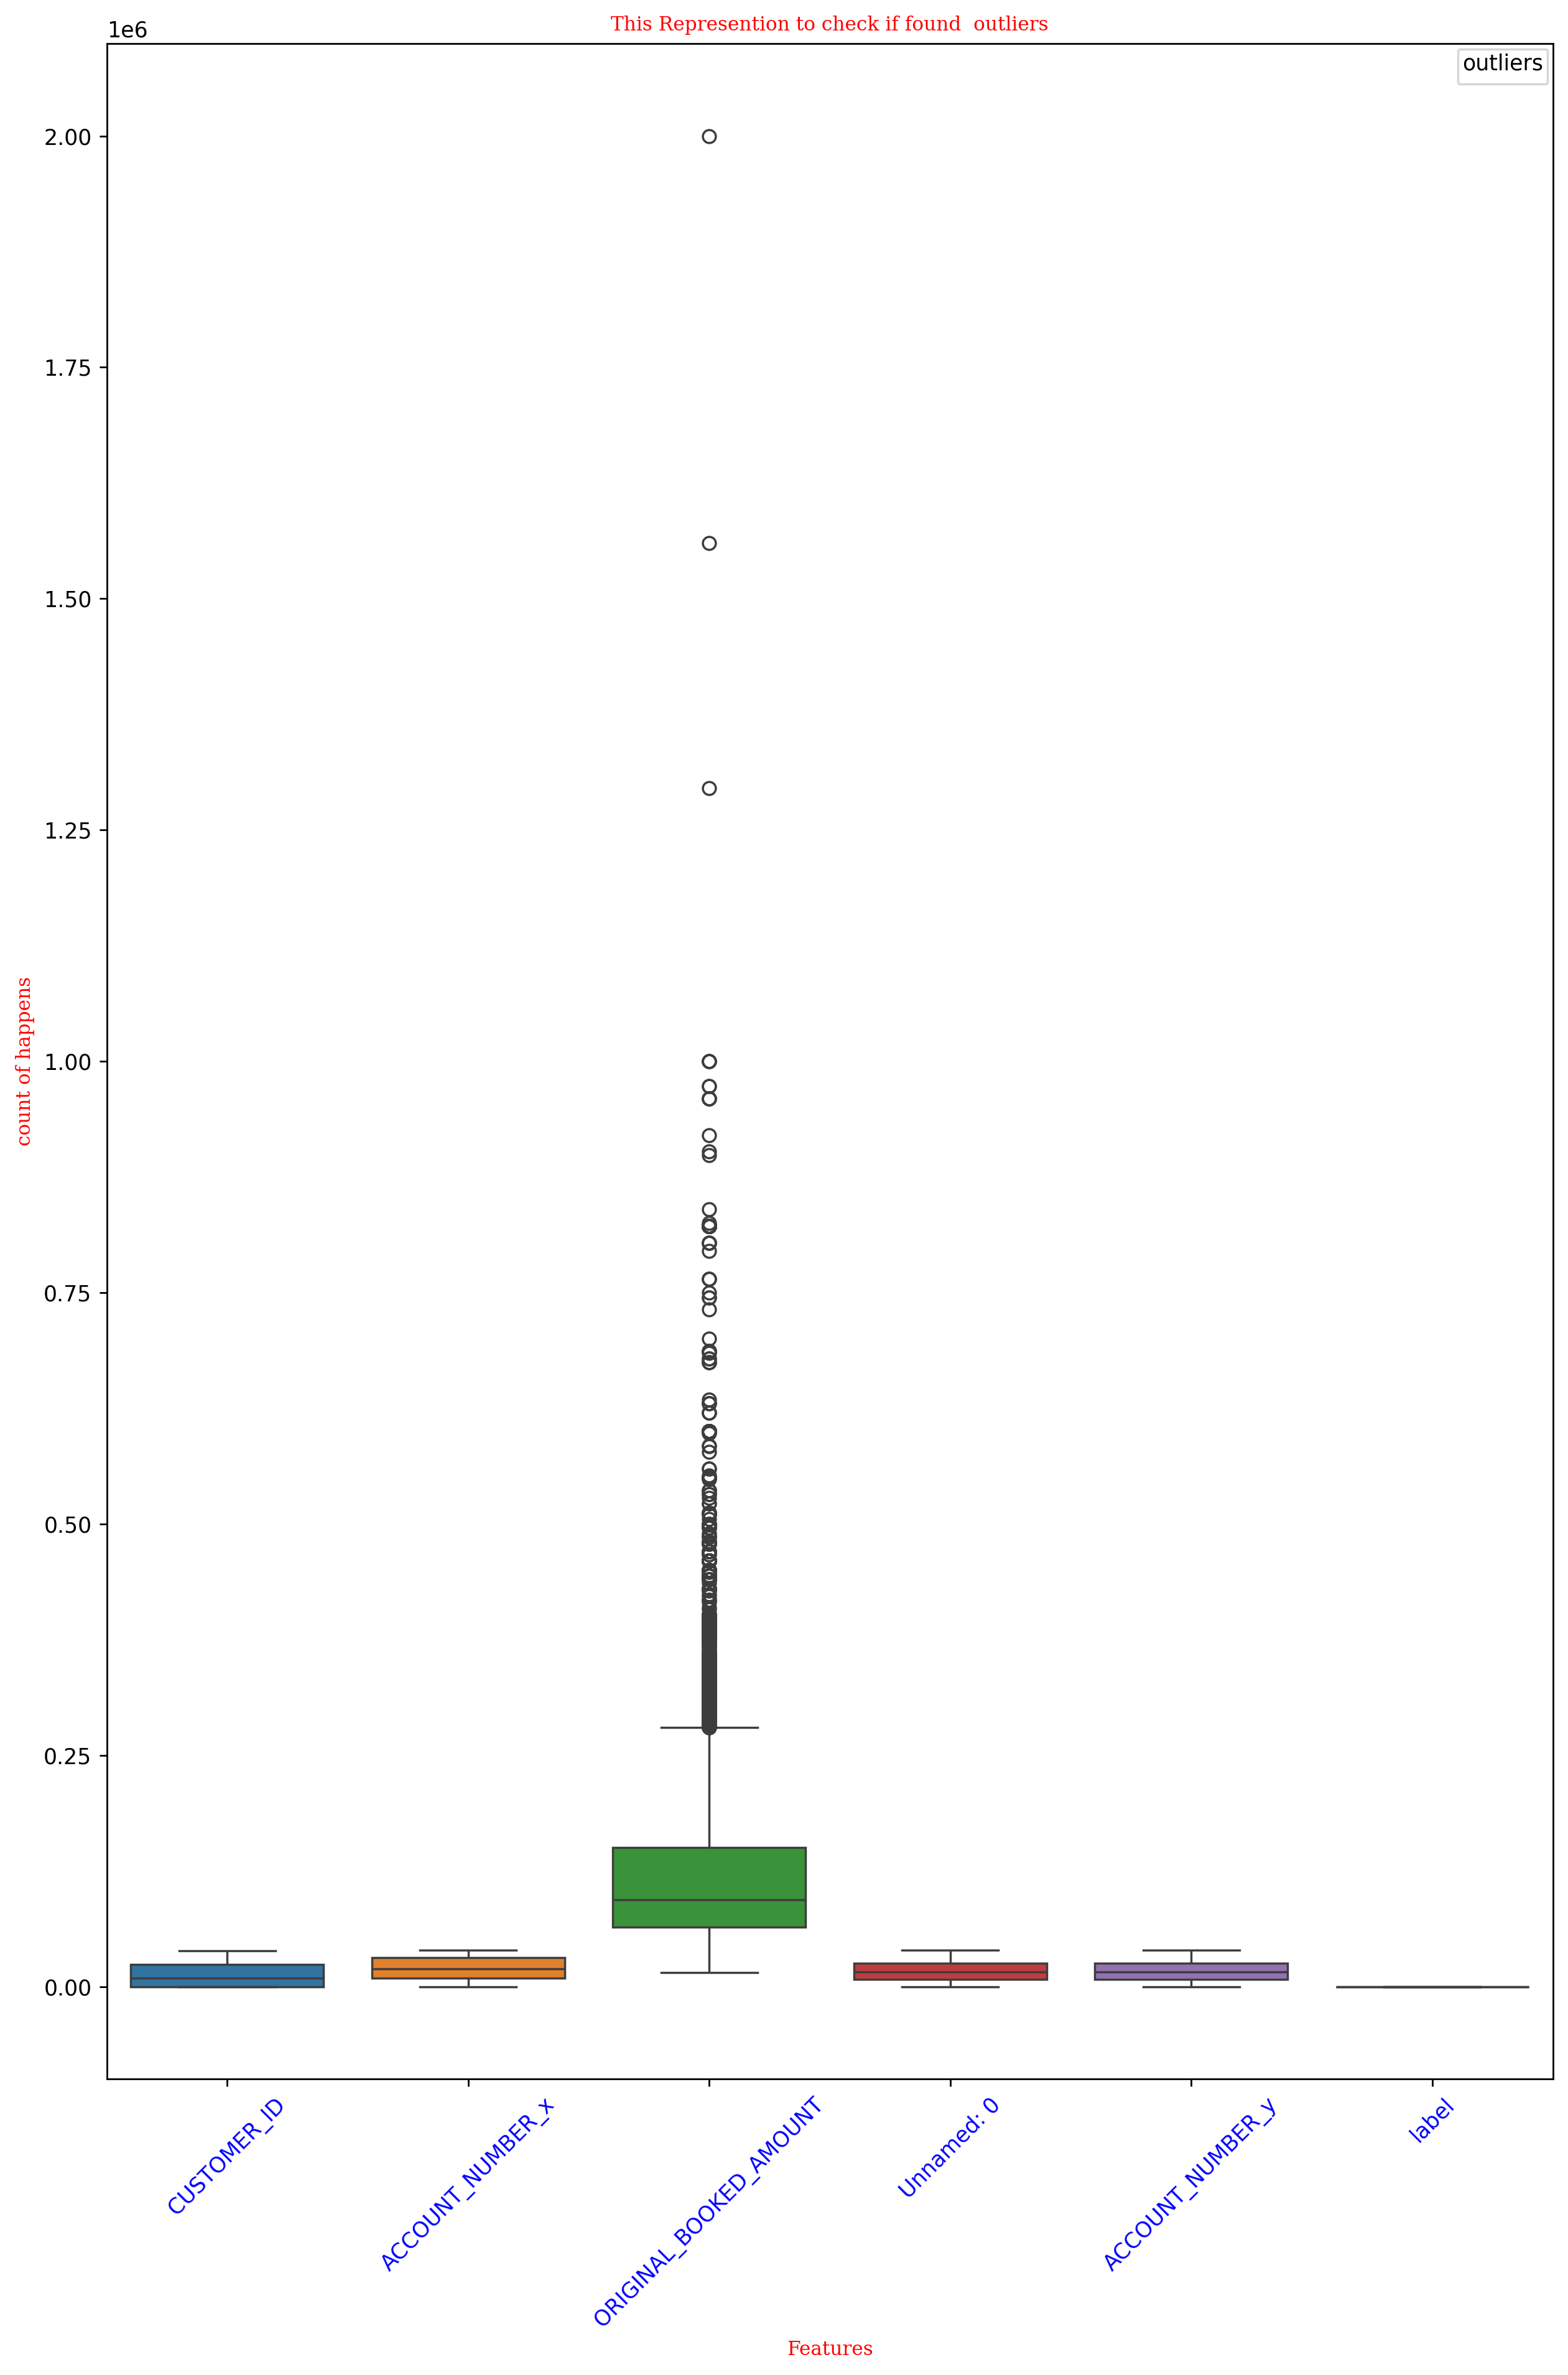

In [20]:
# from this Represention we discover that we found outlier in:
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(12,17),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(df[features])
plt.legend(title="outliers",prop={'size': 5})

## Imputation :

In [21]:
# Impute missing values with the mean for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Impute missing values with the most frequent value for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [22]:
# check the null values :

df.isna().mean()

CUSTOMER_ID               0.0
ACCOUNT_NUMBER_x          0.0
PROGRAM_NAME              0.0
LOAN_OPEN_DATE            0.0
EXPECTED_CLOSE_DATE       0.0
ORIGINAL_BOOKED_AMOUNT    0.0
CAR_TYPE                  0.0
SEX                       0.0
CUSTOMER_OPEN_DATE        0.0
BIRTH_DATE                0.0
PROFESSION                0.0
Unnamed: 0                0.0
ACCOUNT_NUMBER_y          0.0
label                     0.0
dtype: float64

## Visualization 

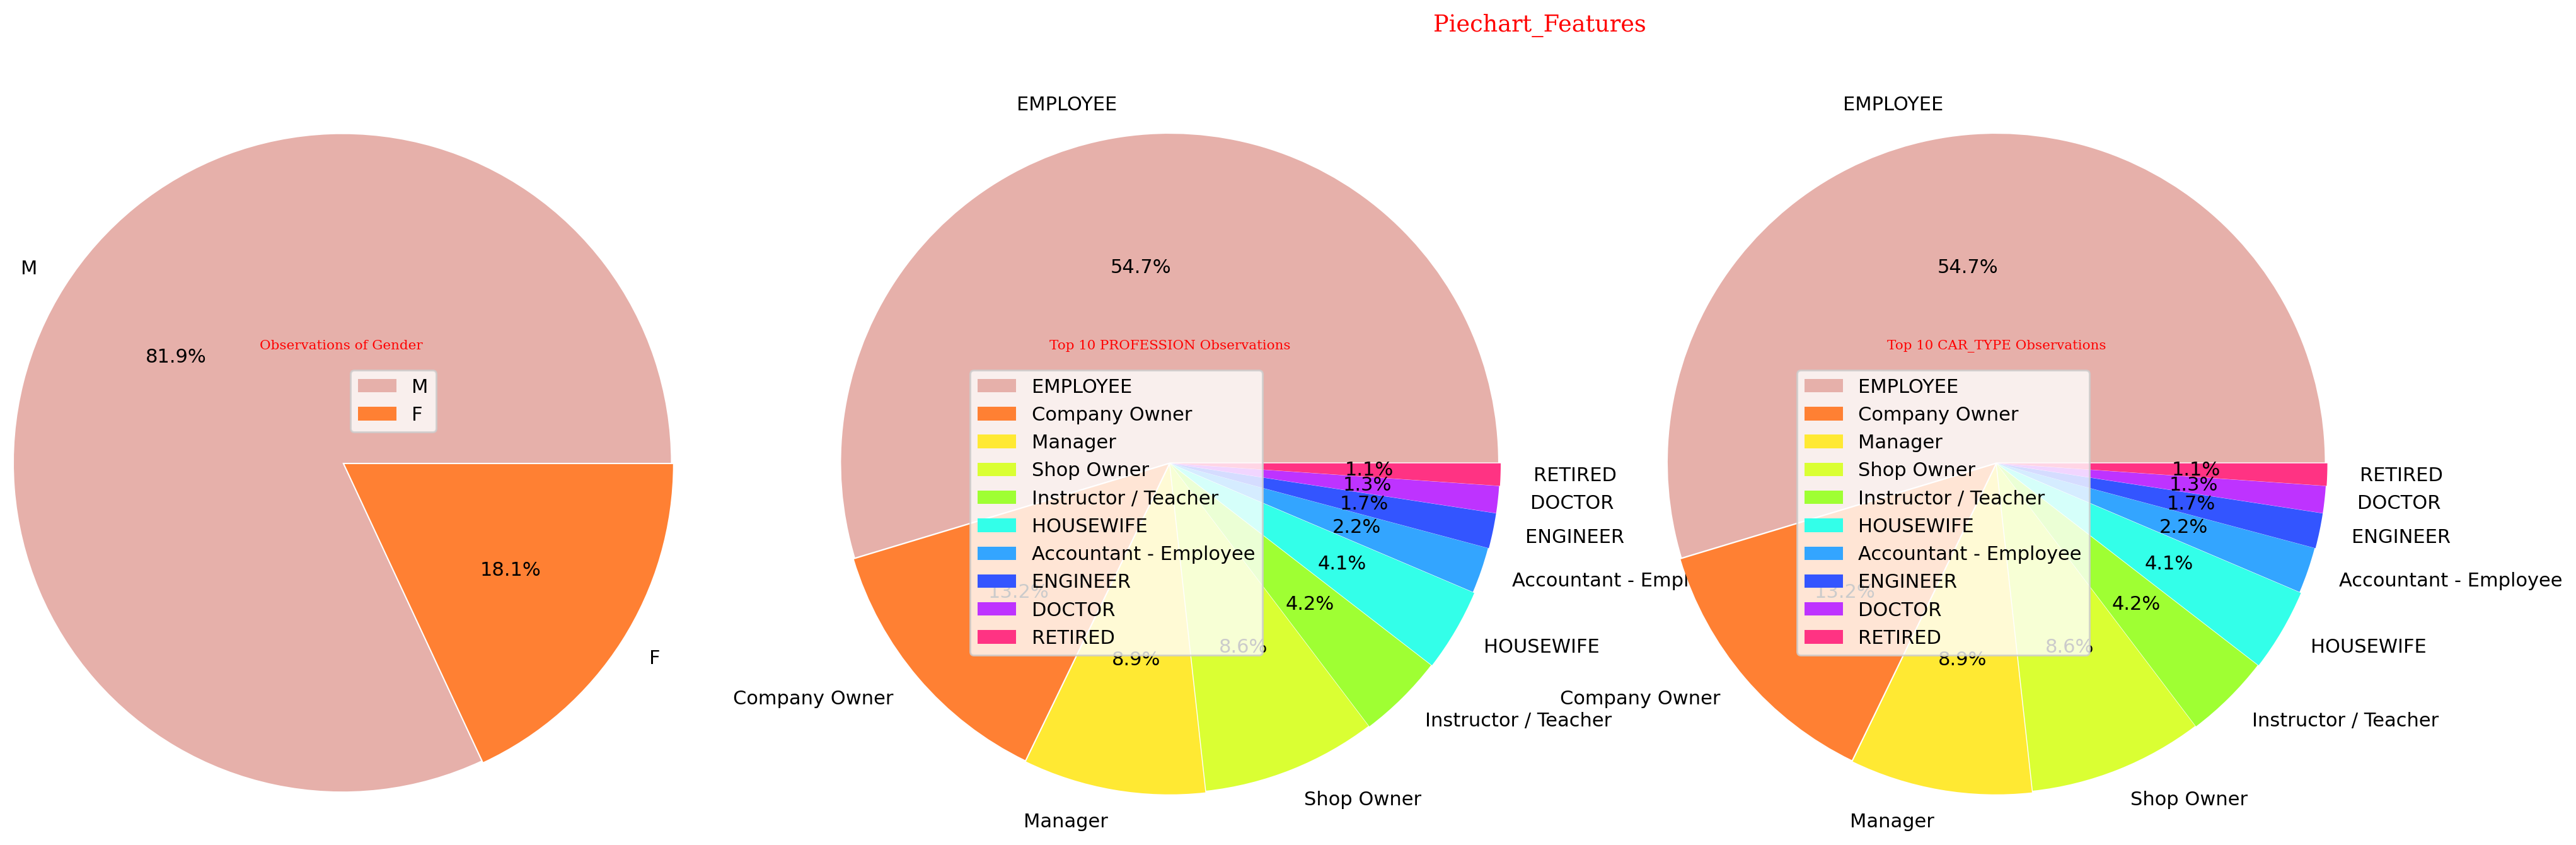

In [23]:

f1 = {"family": "serif", "size": 7, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(25, 25), dpi=220)
plt.suptitle("Piechart_Features",fontdict=f1)

# Create the first subplot
SEX = df["SEX"].value_counts()


plt.subplot(4, 4, 1)  
plt.title("Observations of Gender ", fontdict=f1)


plt.pie(
    x=SEX,  
    labels=SEX.index,  
    colors=["#E6B0AA","#FF8033"],
    explode=[0.01, 0.02],
    autopct='%1.1f%%',
    radius=4)

plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0, hspace=4)



# Plot 2

PROFESSION = df["PROFESSION"].value_counts()
PROFESSION_top_10=PROFESSION.head(10)
plt.subplot(4, 4, 2)  # Create the second subplot
plt.title("Top 10 PROFESSION Observations", fontdict=f1)
plt.pie(
    x=PROFESSION_top_10,
    labels=PROFESSION_top_10.index,  
    colors=["#E6B0AA","#FF8033","#FFE933","#DAFF33","#9FFF33",
            "#33FFE9","#33A5FF","#3355FF","#BE33FF","#FF3383"][:len(PROFESSION_top_10)],
    explode=[0.01, 0.02, 0.03, 0.01, 0.02, 0.03, 0.01,0.02,0.02,0.03][:len(PROFESSION_top_10)],
    autopct='%1.1f%%',
    radius=4,
)



# Adjust the spacing between subplots
plt.subplots_adjust(wspace=3, hspace=3)
plt.legend()


# Plot 3

CAR_TYPE = df["CAR_TYPE"].value_counts()
CAR_TYPE_top_10=PROFESSION.head(10)
plt.subplot(4, 4, 3)  
plt.title("Top 10 CAR_TYPE Observations", fontdict=f1)
plt.pie(
    x=CAR_TYPE_top_10,
    labels=CAR_TYPE_top_10.index,  
    colors=["#E6B0AA","#FF8033","#FFE933","#DAFF33","#9FFF33",
            "#33FFE9","#33A5FF","#3355FF","#BE33FF","#FF3383"][:len(CAR_TYPE_top_10)],
    explode=[0.01, 0.02, 0.03, 0.01, 0.02, 0.03, 0.01,0.02,0.02,0.03][:len(CAR_TYPE_top_10)],
    autopct='%1.1f%%',
    radius=4,
)



# Adjust the spacing between subplots
plt.subplots_adjust(wspace=3, hspace=3)
plt.legend()



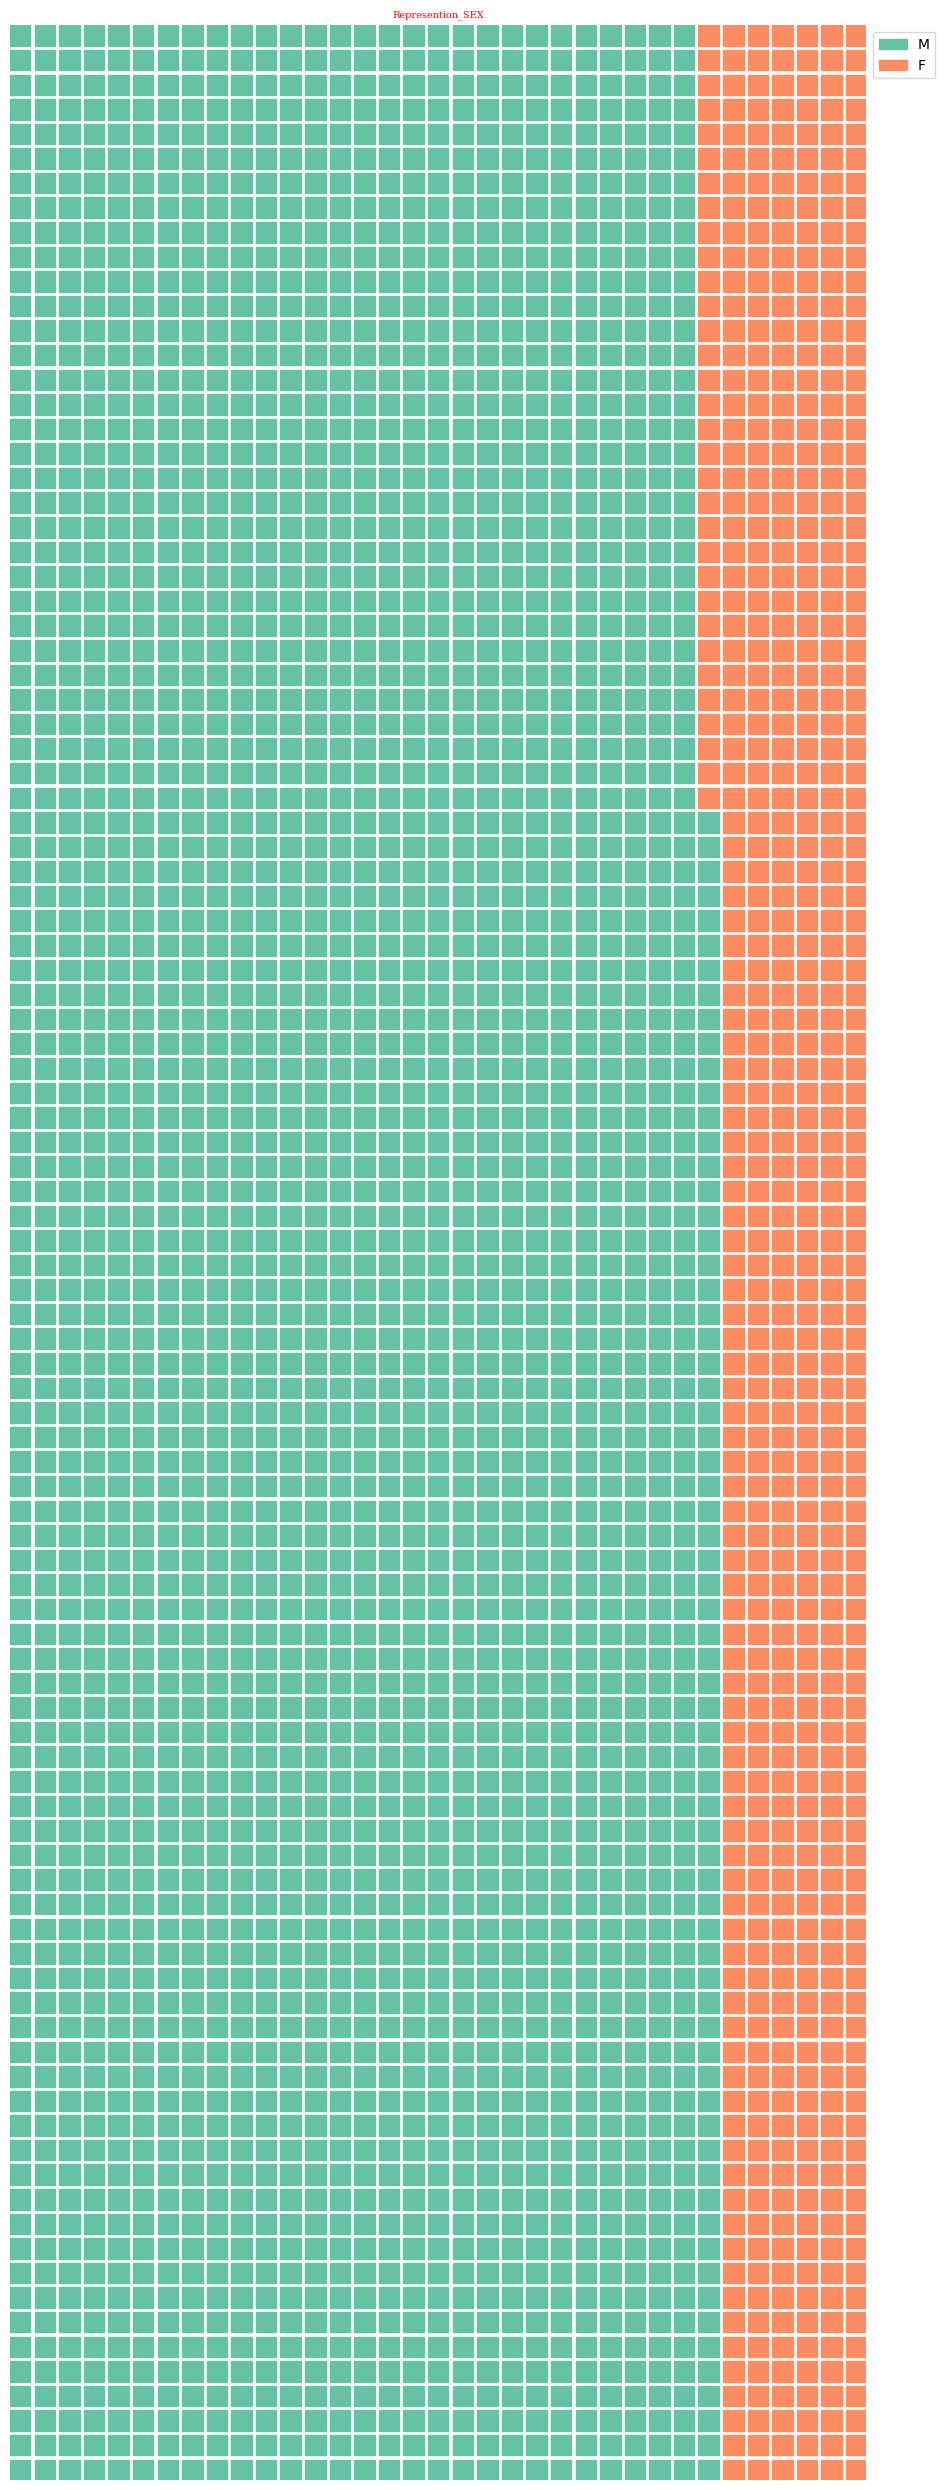

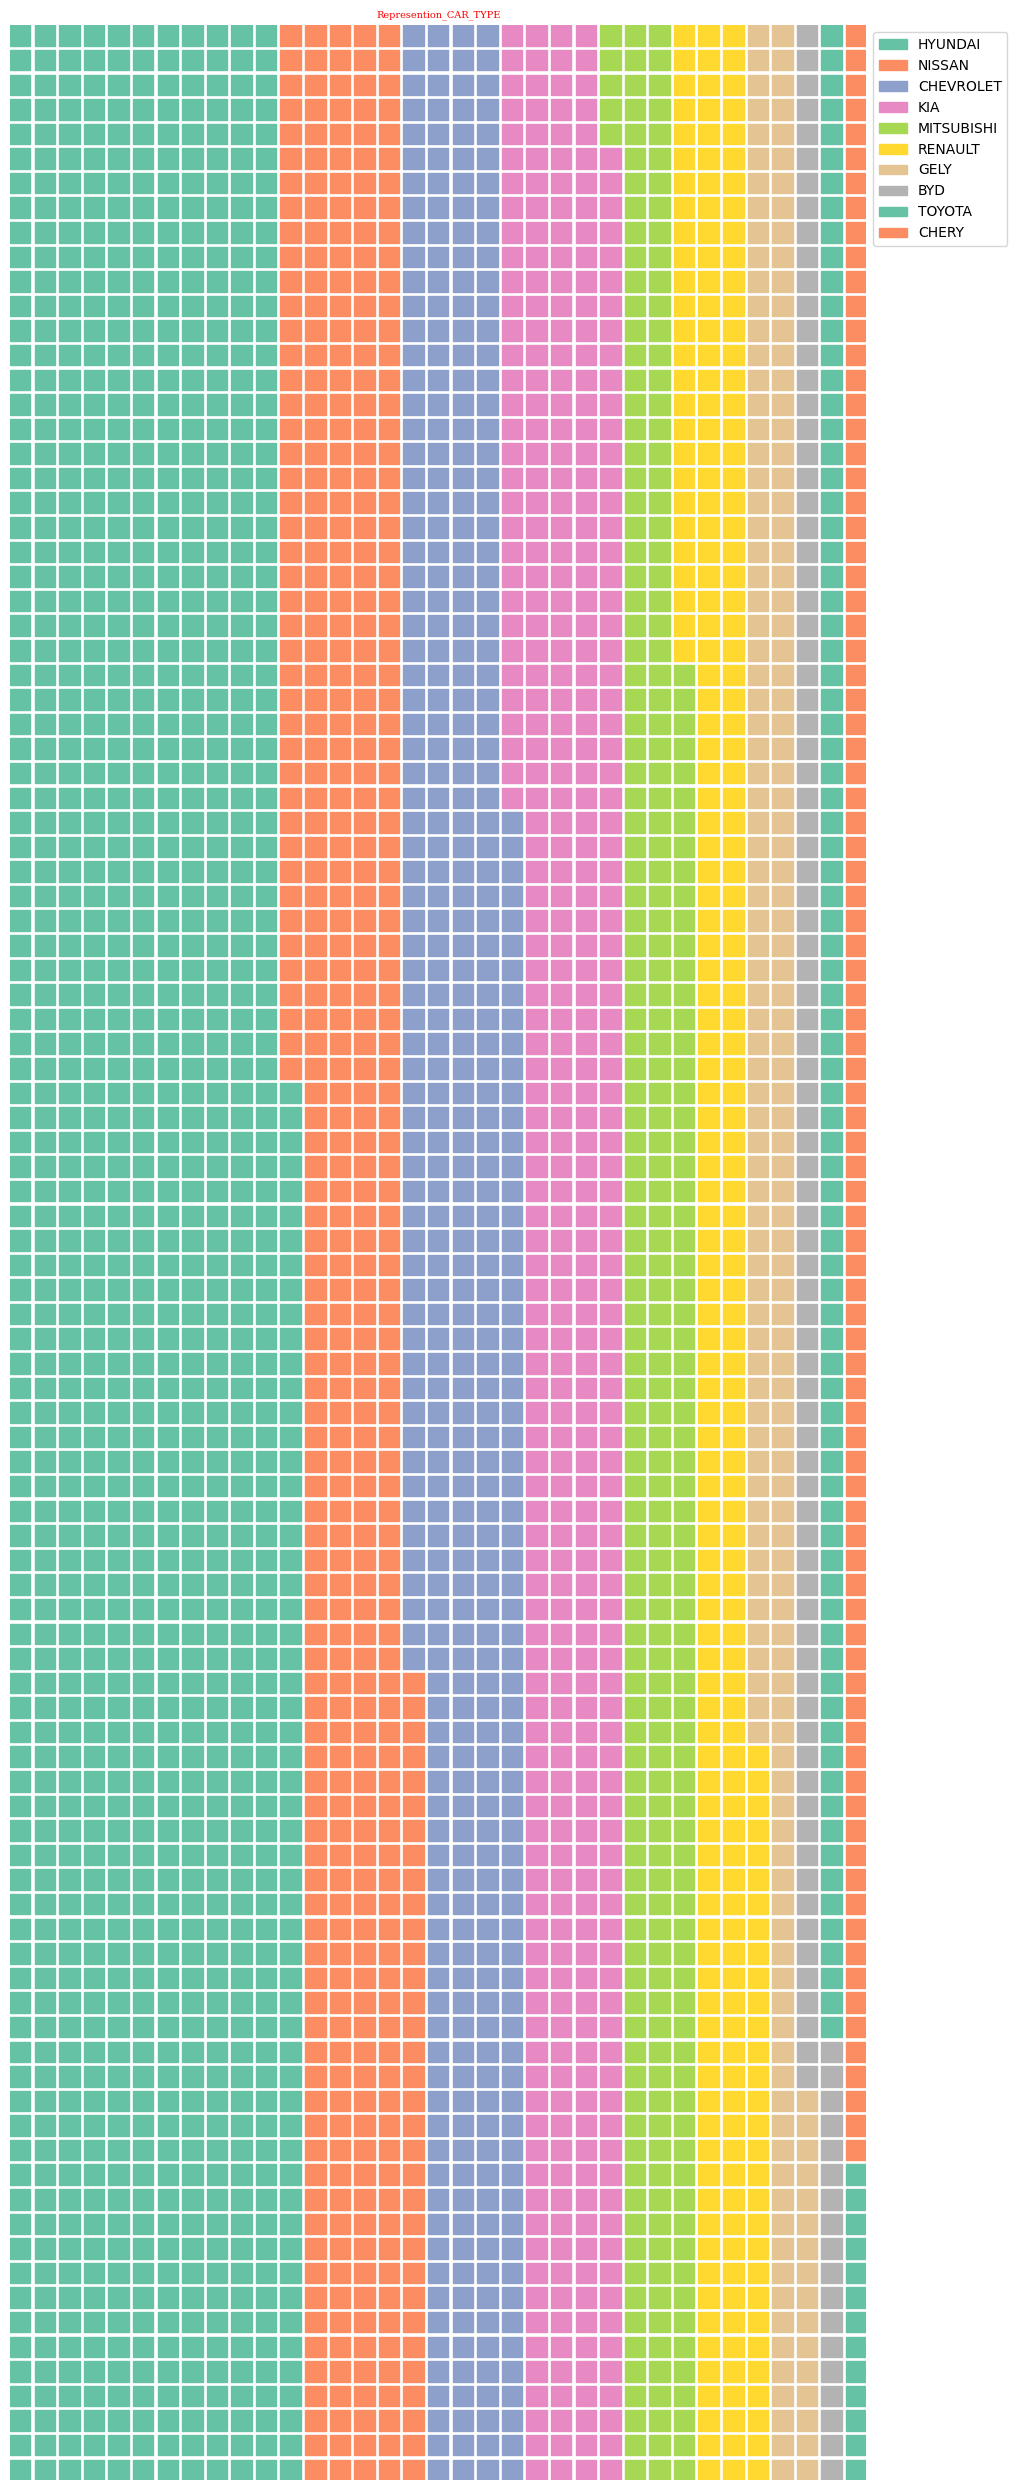

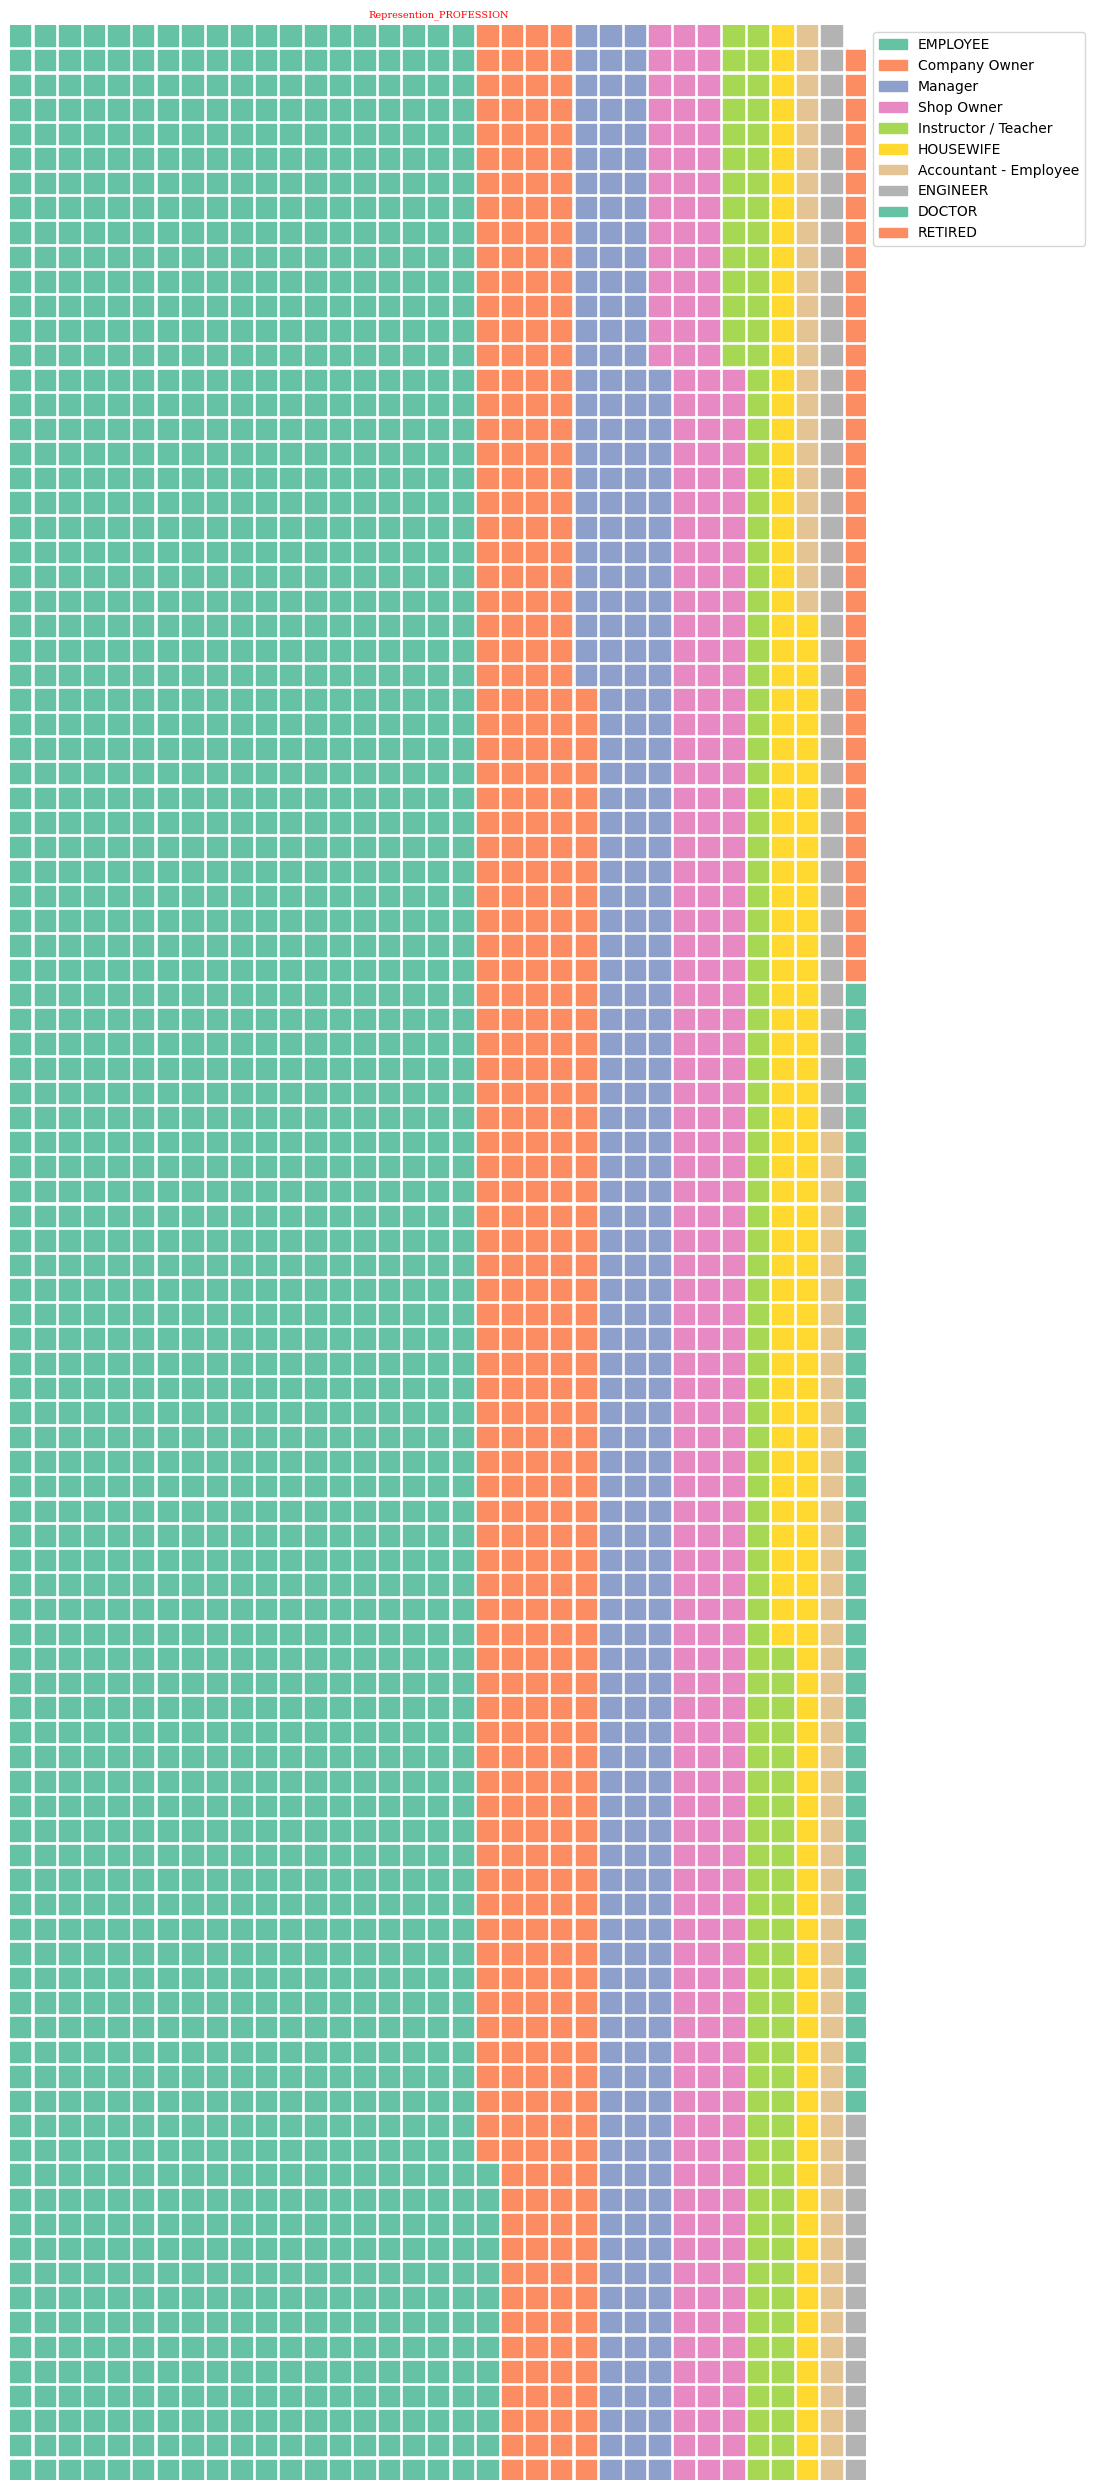

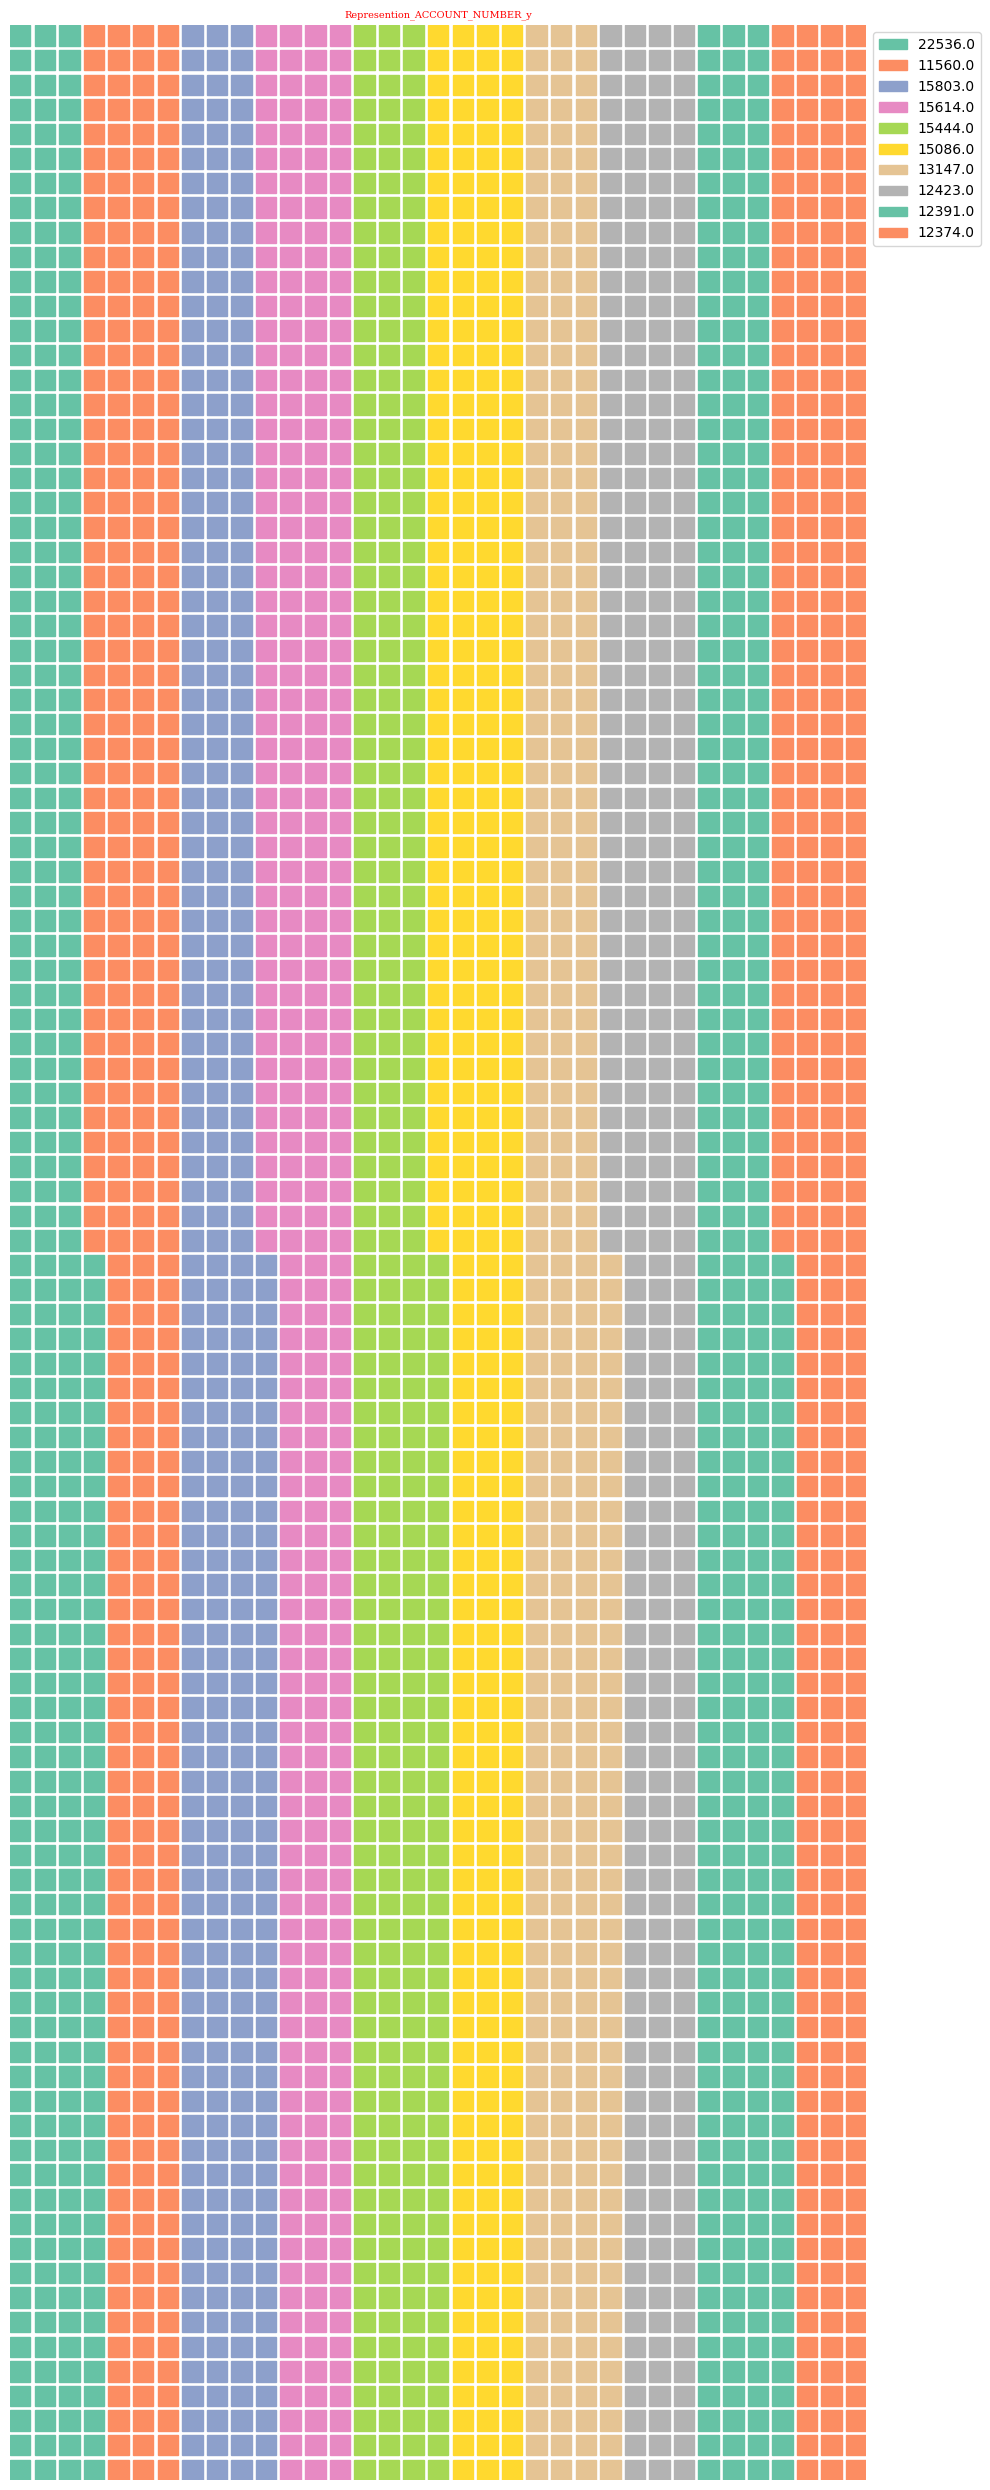

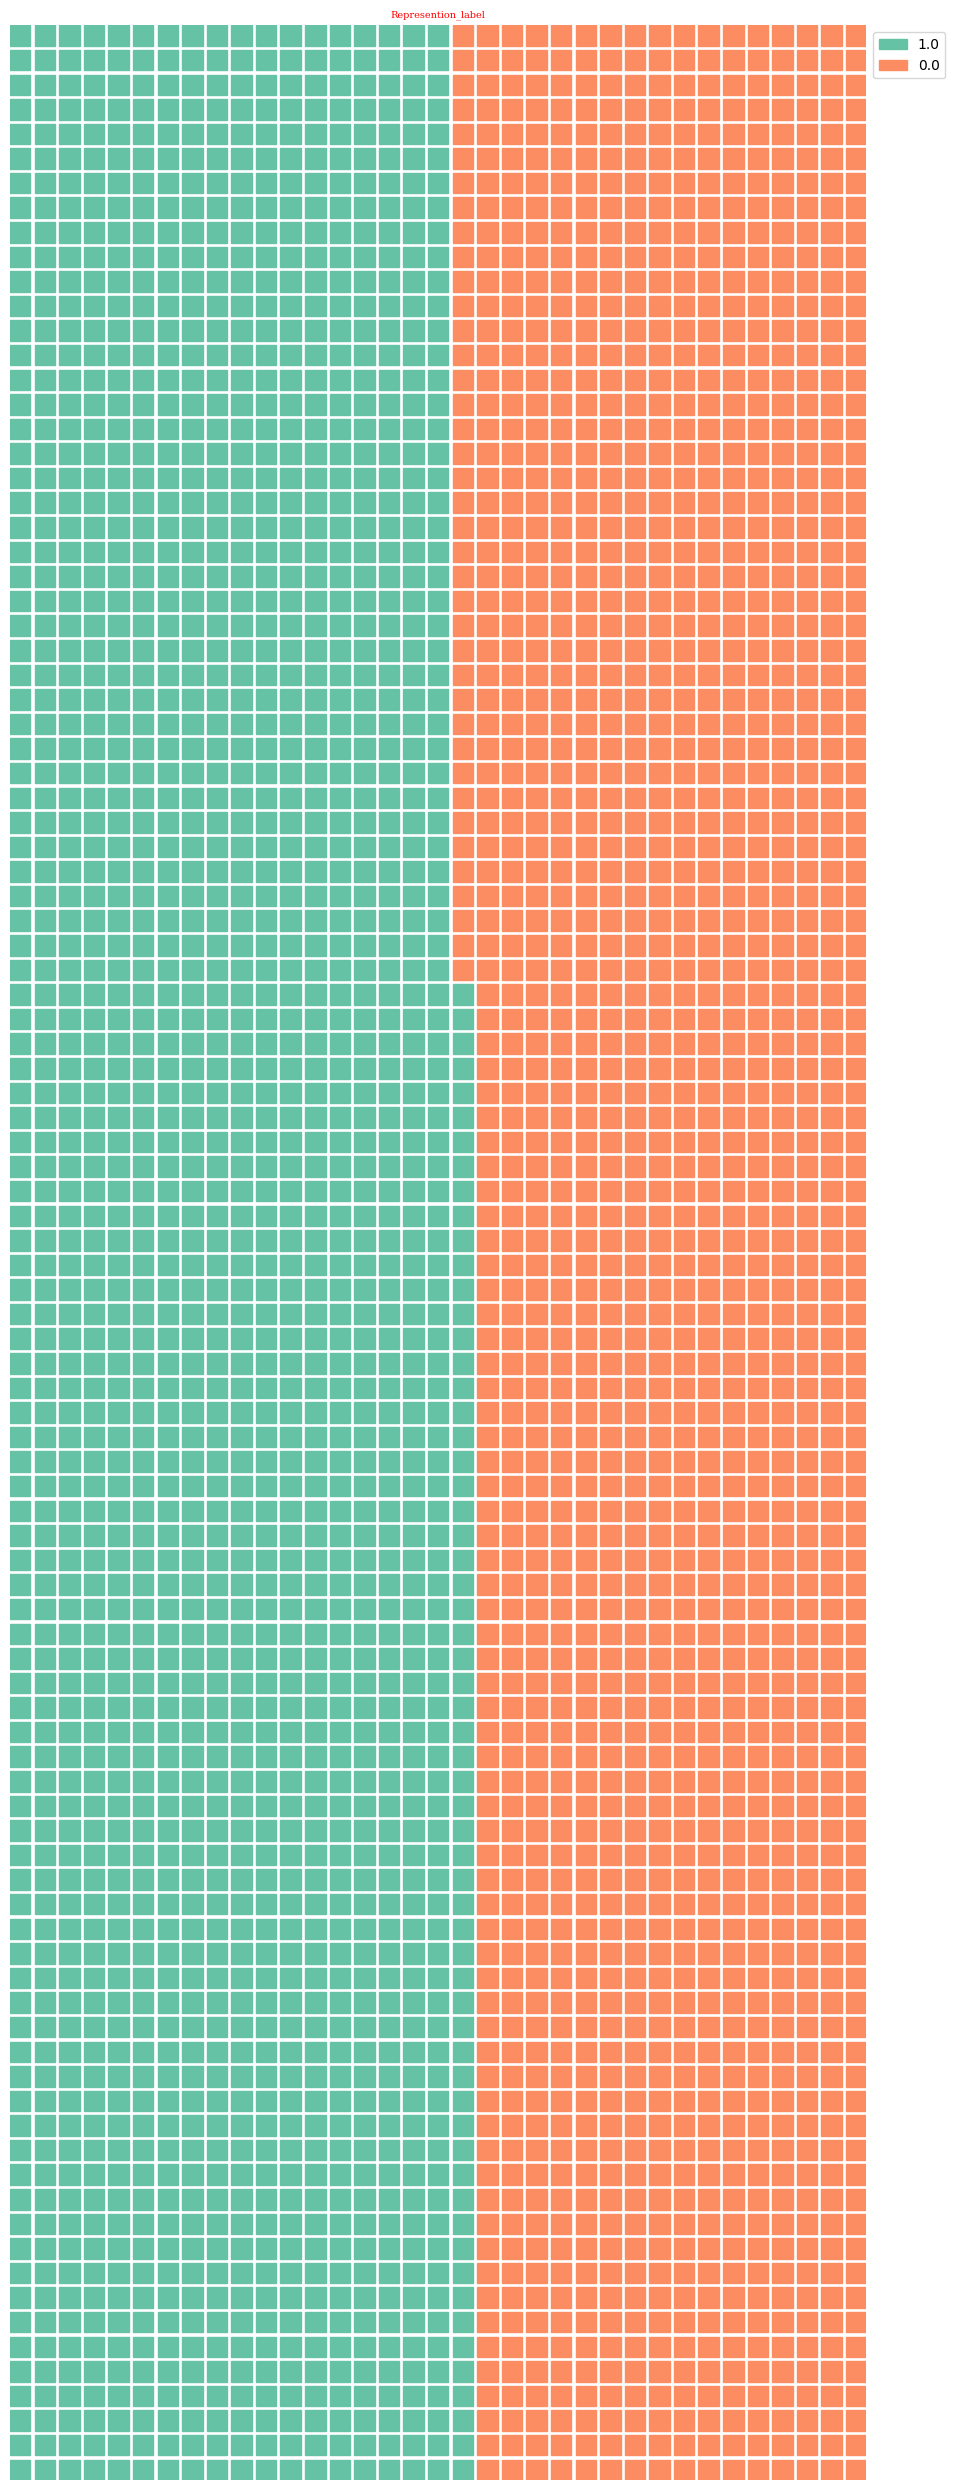

In [24]:
from pywaffle import Waffle
# to know which item in every feture is manged :
Features=["SEX","CAR_TYPE","PROFESSION","ACCOUNT_NUMBER_y","label"]
for col in Features :
    f = df[col].value_counts()
    TOp_10_f= f.head(10)
    
    # Ensure that 'values' is a list of numerical values
    values = TOp_10_f.tolist()

    
    
    # Create the waffle chart
    fig = plt.figure(
       FigureClass=Waffle,
       rows=100,
       columns=35,
       values=values,
       legend={'labels': TOp_10_f.index.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
                )
    plt.title("Represention_" +col,fontdict=f1)

# Show the plot
plt.show()

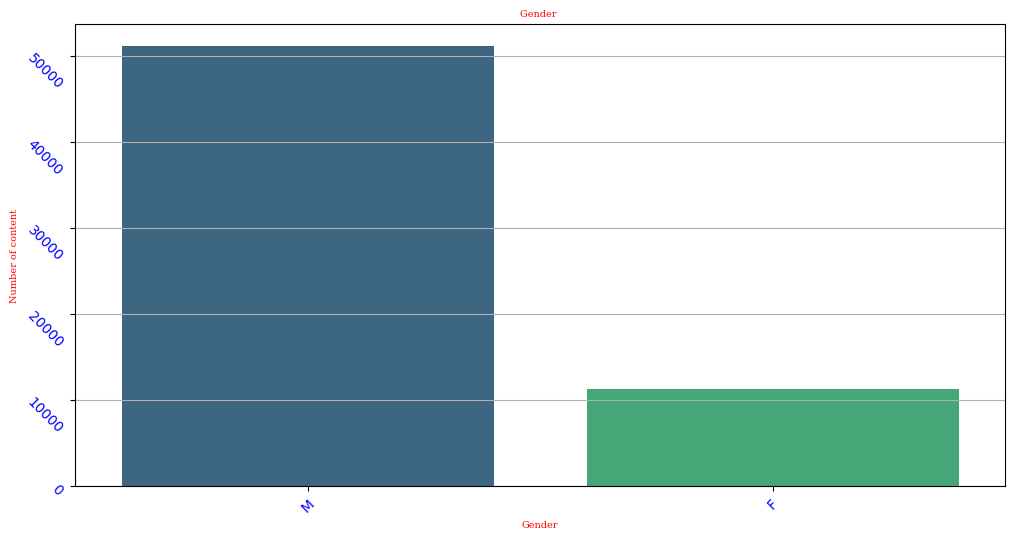

/tmp/ipykernel_13118/820378802.py:17: UserWarning: 
The palette list has fewer values (5) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=PROFESSION.index, y=PROFESSION.values,hue=PROFESSION.index,palette=color_palette)


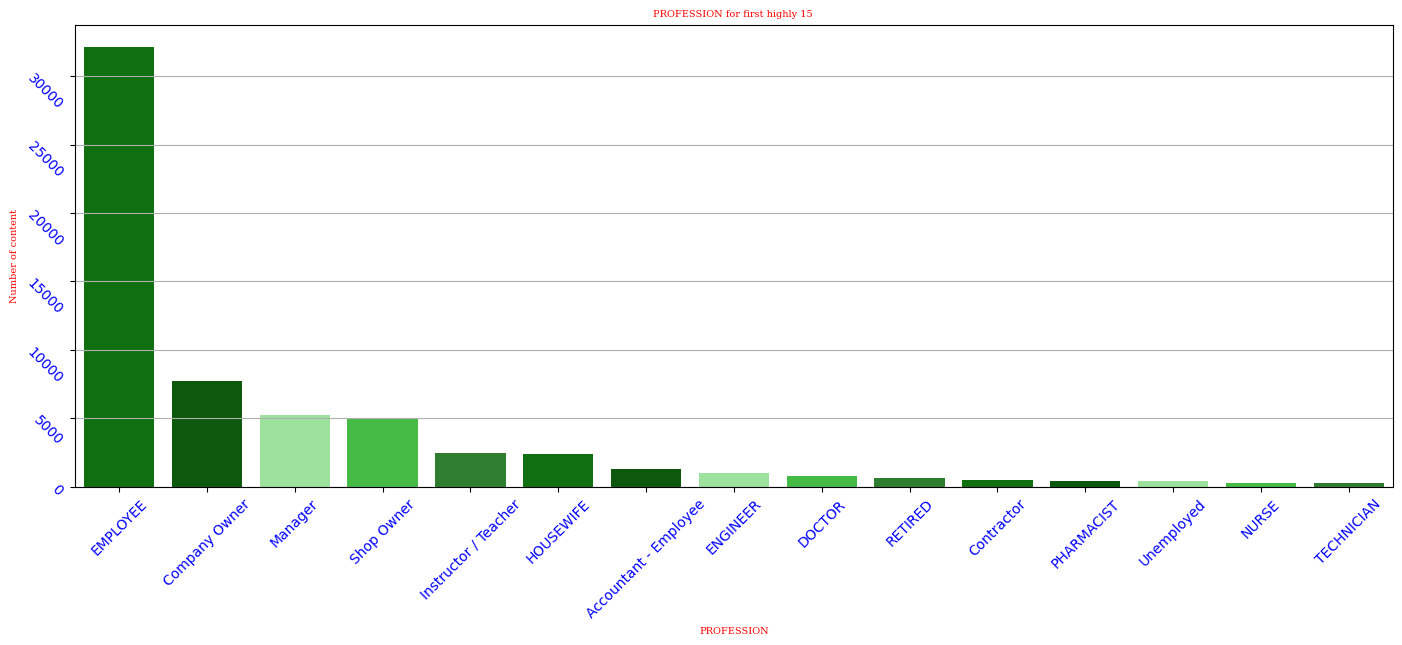

In [25]:
# Gender observation : 
color_palette = ['green', 'darkgreen', 'lightgreen', 'limegreen', 'forestgreen']
Gender = df['SEX'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=Gender.index, y=Gender.values,hue=Gender.index,palette="viridis")
plt.title('Gender ',fontdict=f1)
plt.xlabel('Gender',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

# PROFESSION observation : 
PROFESSION = df['PROFESSION'].value_counts().head(15)
plt.figure(figsize=(17, 6))
sns.barplot(x=PROFESSION.index, y=PROFESSION.values,hue=PROFESSION.index,palette=color_palette)
plt.title('PROFESSION for first highly 15 ',fontdict=f1)
plt.xlabel('PROFESSION',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()


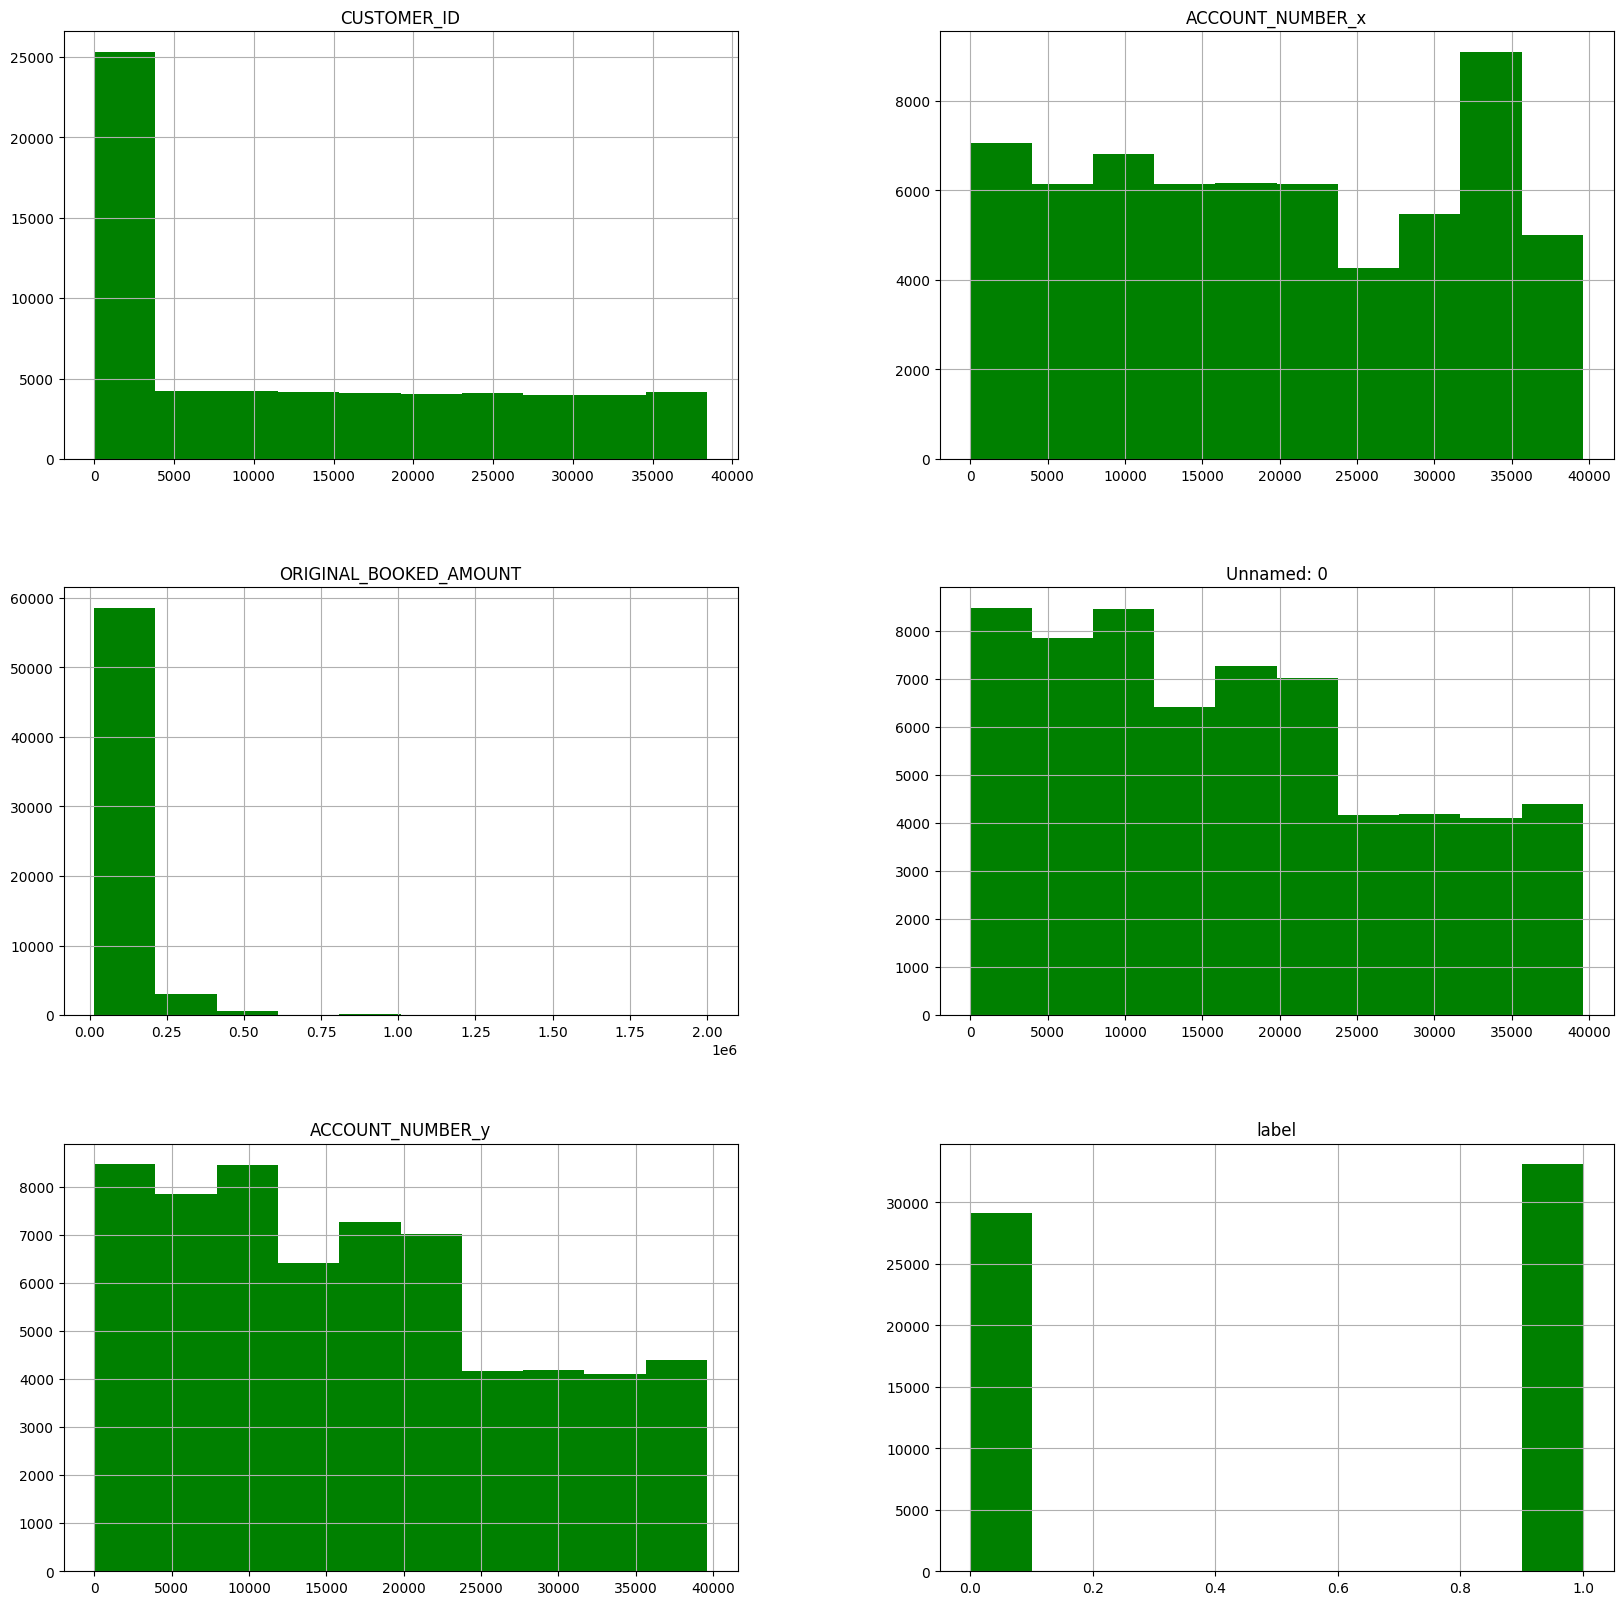

In [26]:
# Histogram for all dataset:
df.hist(figsize=(20,20),color="g")
plt.show()

<Figure size 7500x4500 with 0 Axes>

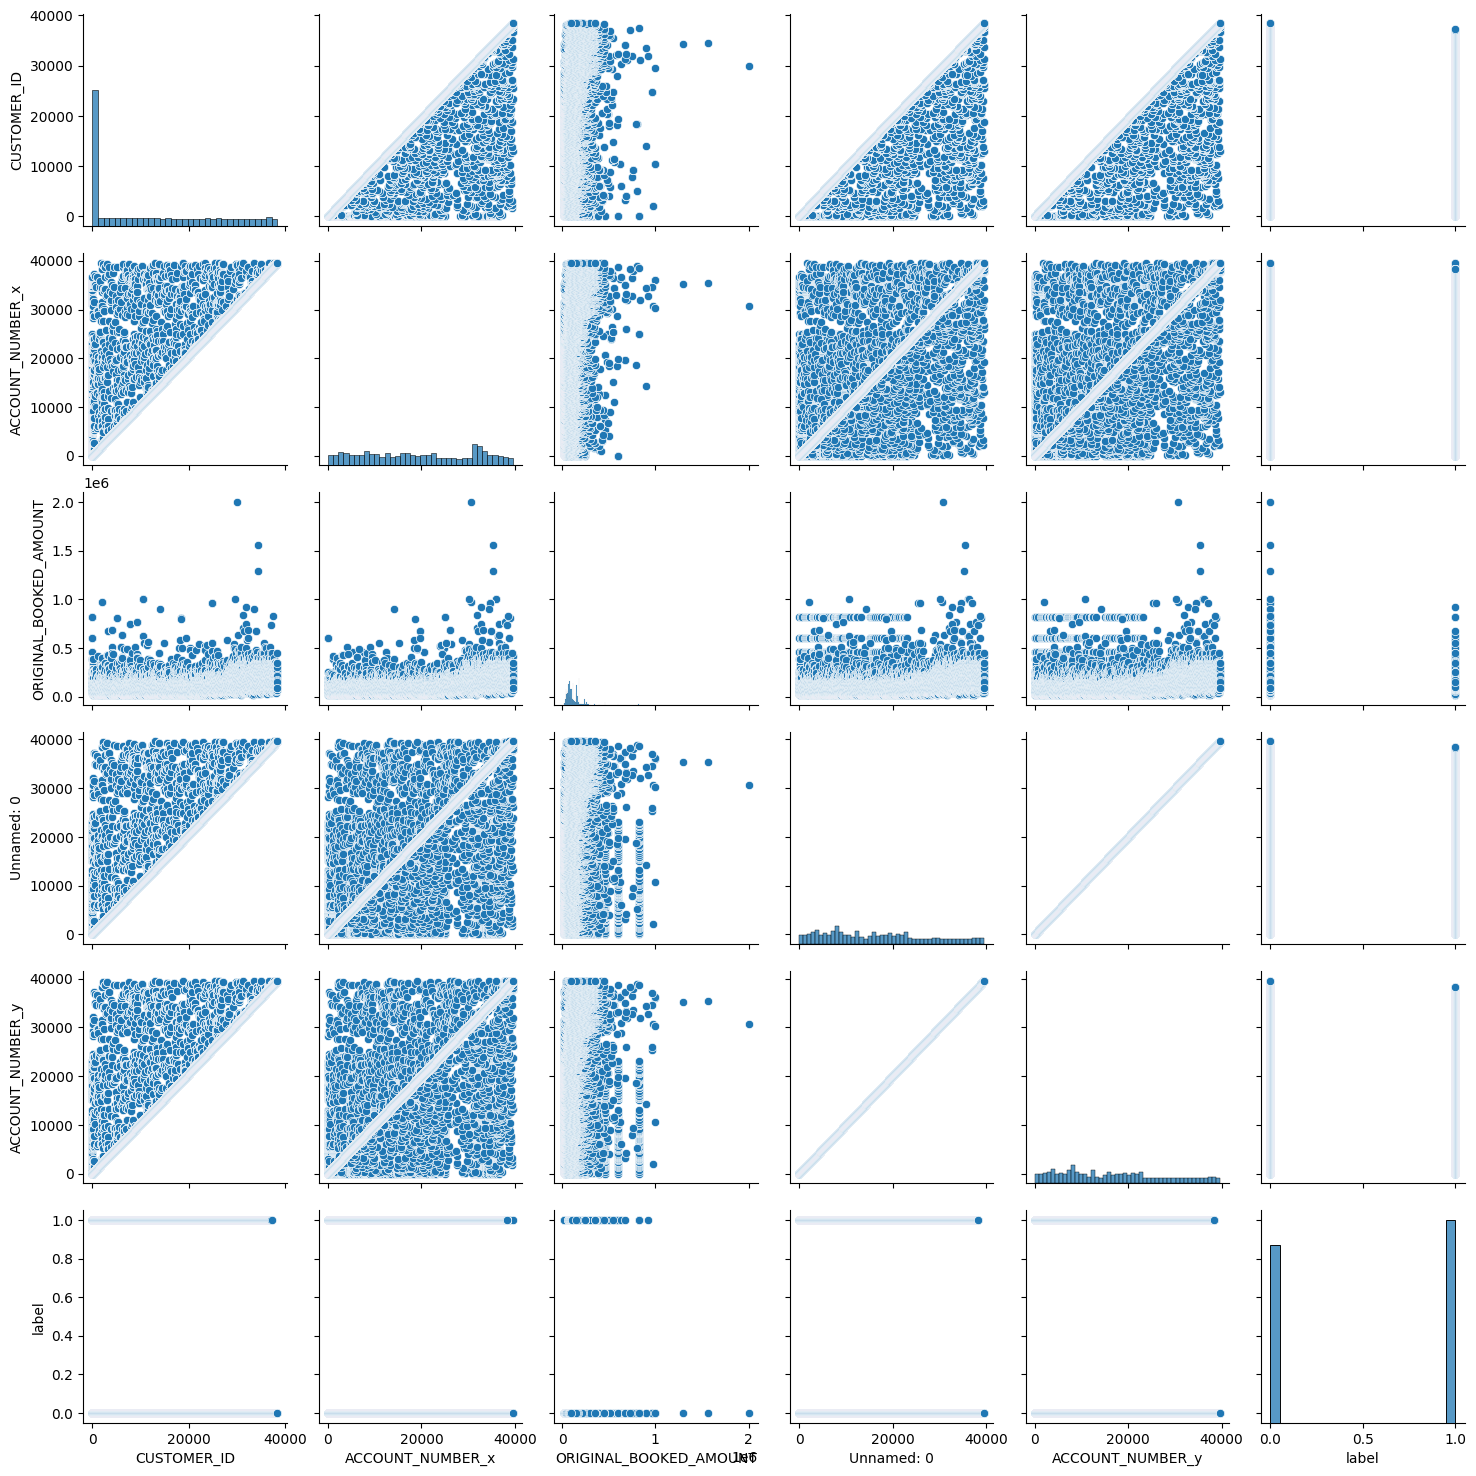

In [28]:
plt.figure(figsize=(25,15),dpi=300)
sns.pairplot(df.select_dtypes(include="float64"))

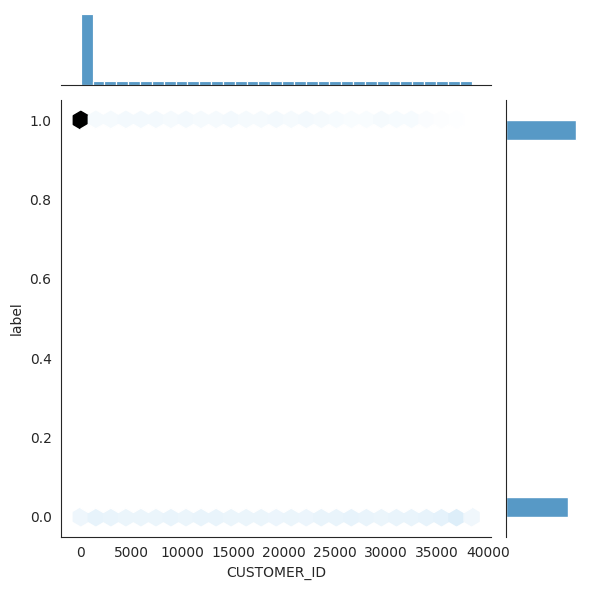

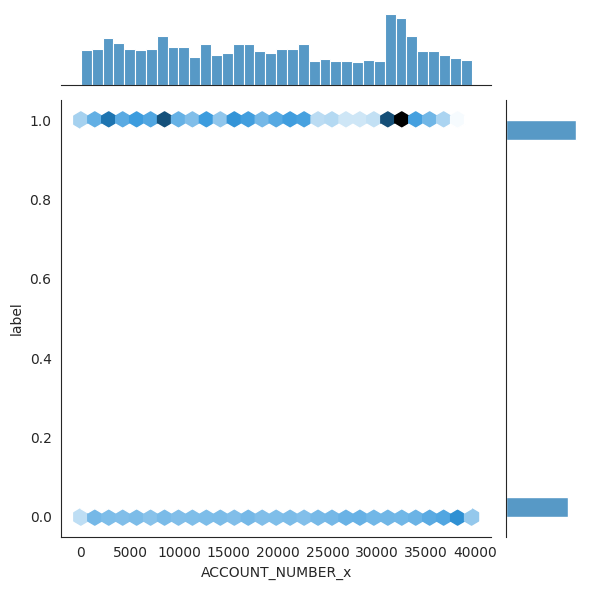

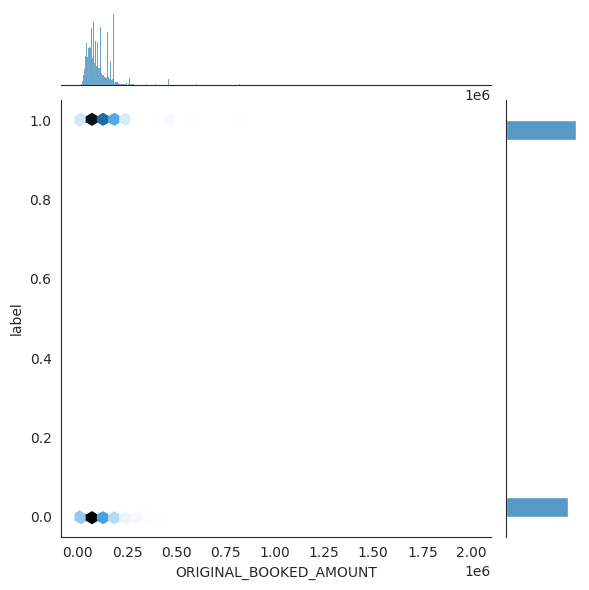

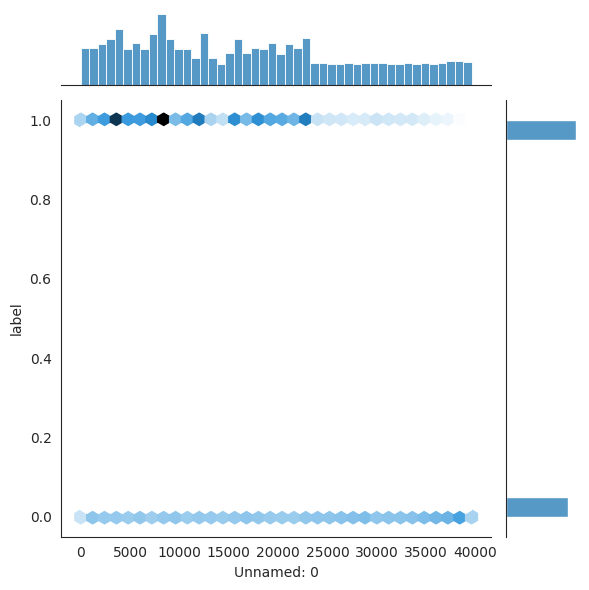

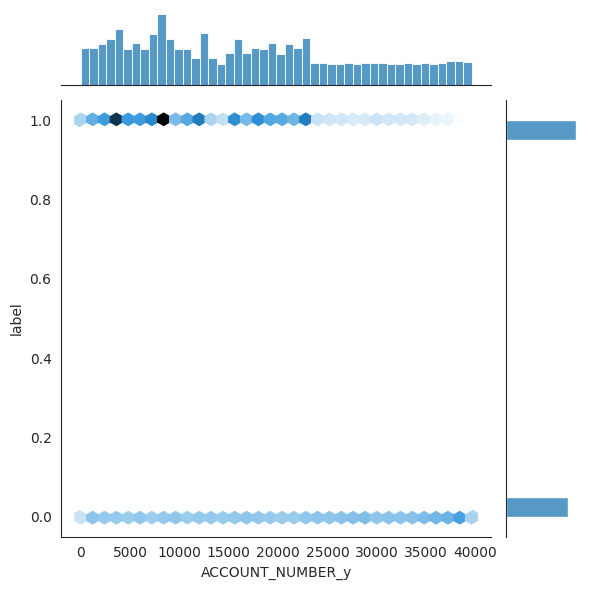

In [32]:
for col in df.select_dtypes(include="float64"):
    if col !="label":
      with sns.axes_style("white"):
          sns.jointplot(x=df[col],y=df["label"],kind="hex")

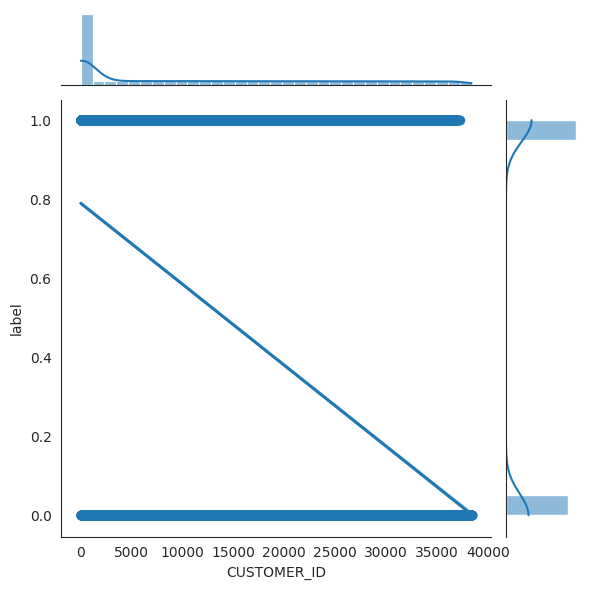

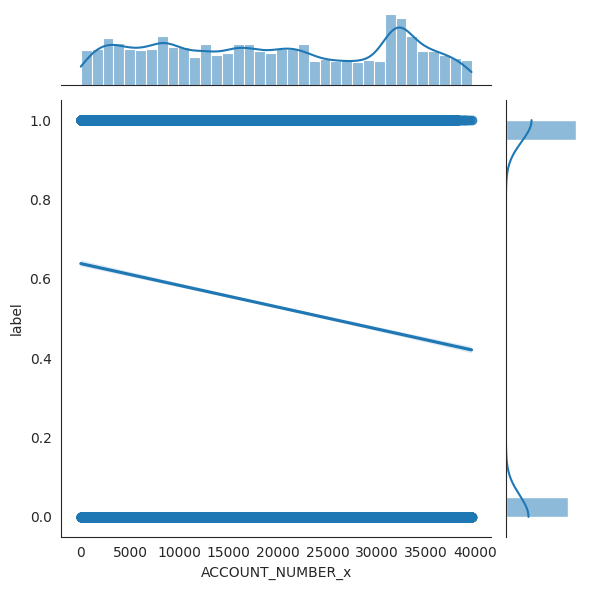

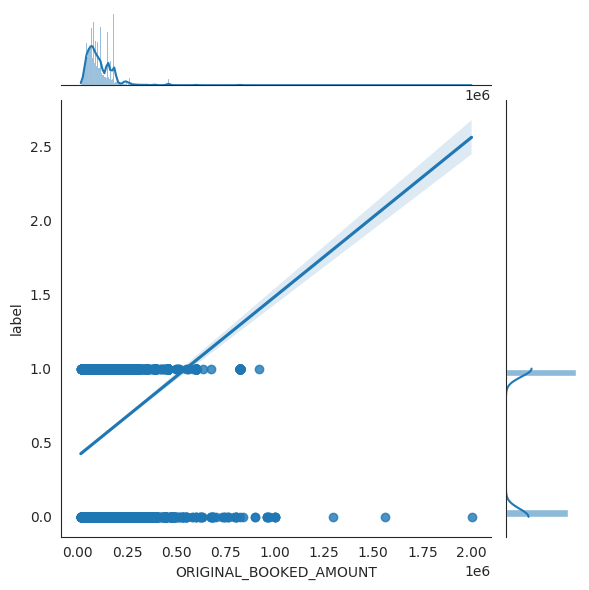

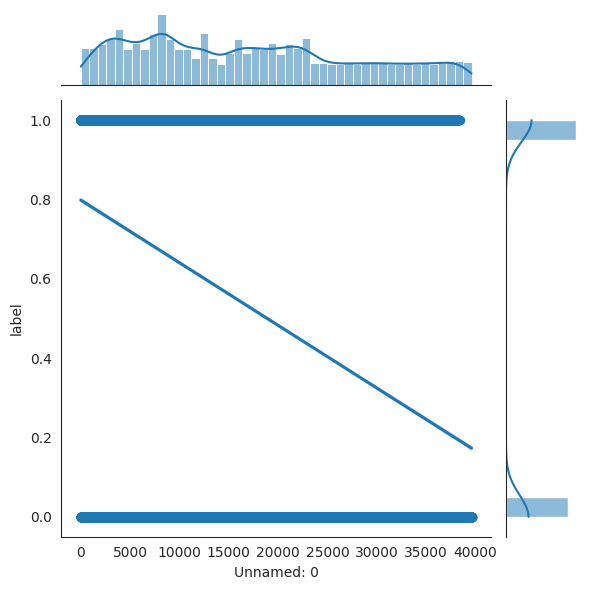

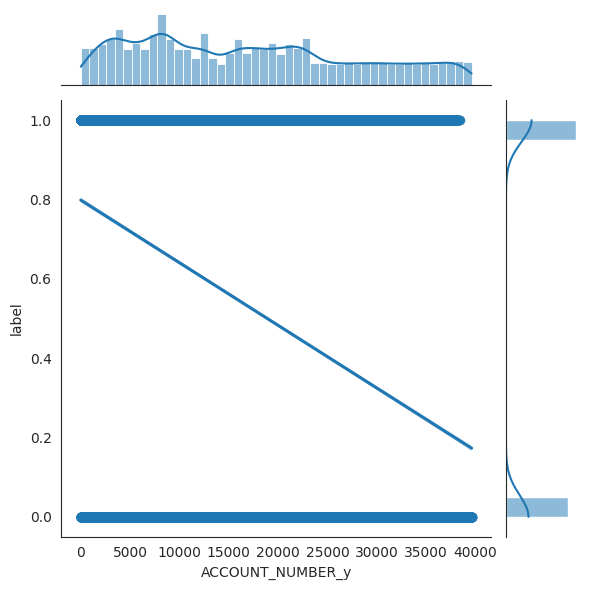

In [34]:
for col in df.select_dtypes(include="float64"):
    if col !="label":
      with sns.axes_style("white"):
          sns.jointplot(x=df[col],y=df["label"],kind="reg")

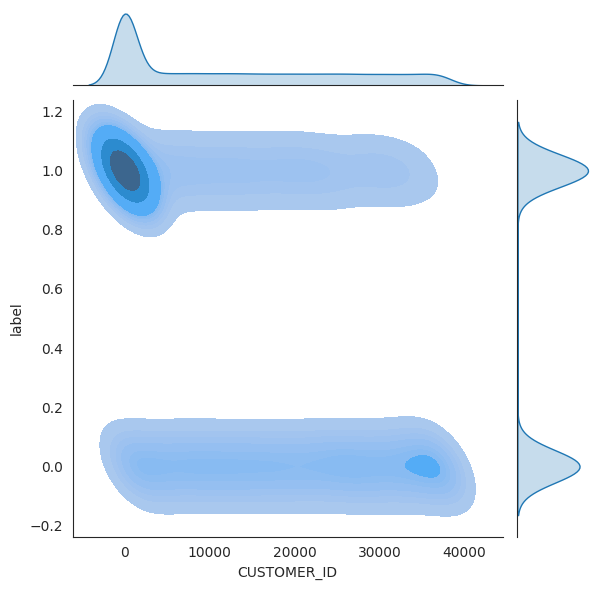

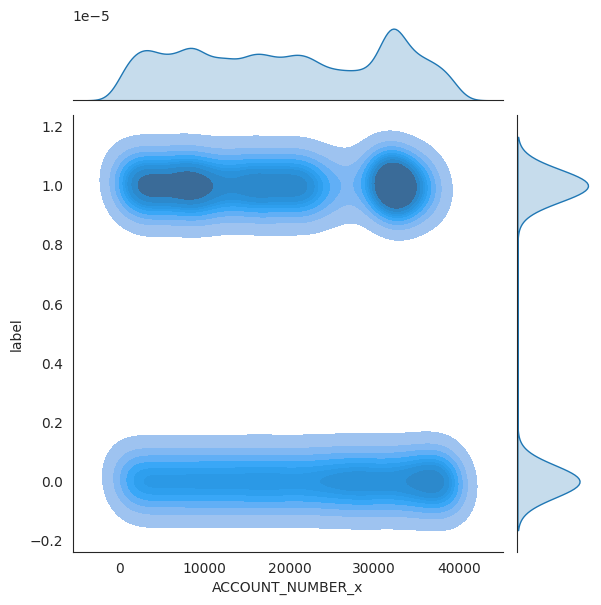

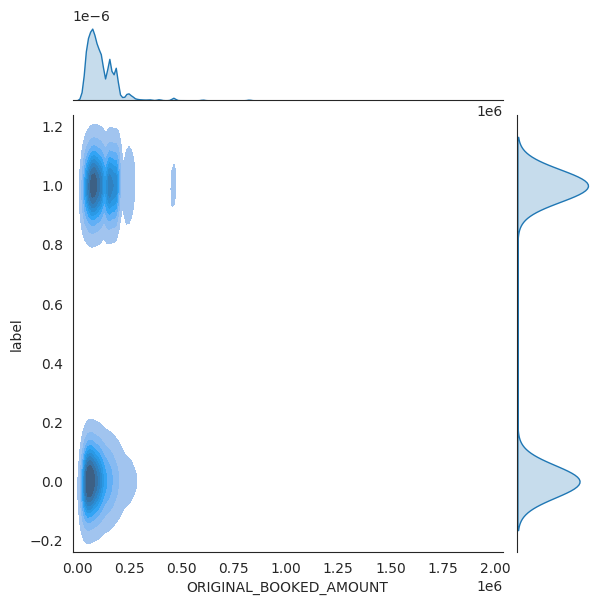

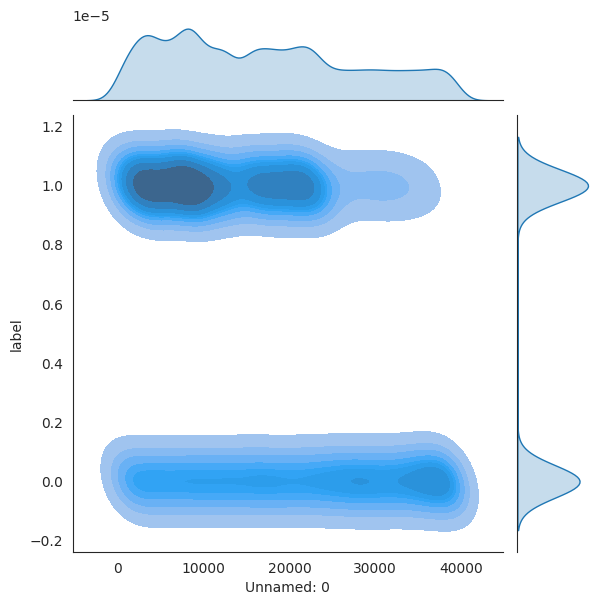

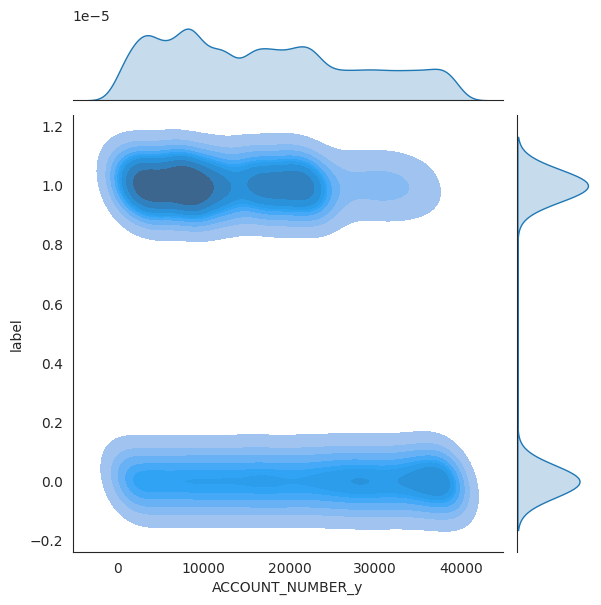

In [35]:
for col in df.select_dtypes("number"):
    if col !="label":
       with sns.axes_style("white"):
          sns.jointplot(x=df[col],y=df["label"],kind="kde",fill=True)

## Encoding :

In [36]:
# Label Encoding for categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df

,CUSTOMER_ID,ACCOUNT_NUMBER_x,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,Unnamed: 0,ACCOUNT_NUMBER_y,label
0,1.0,1.0,8,438,62,91000.0,30,1,2161,10217,21,0.0,1.0,0.0
1,2.0,2.0,23,686,81,35000.0,5,1,2182,10006,21,1.0,2.0,0.0
2,3.0,3.0,6,17,18,52500.0,8,0,2202,9959,23,2.0,3.0,0.0
3,4.0,4.0,3,427,39,103000.0,39,1,2157,7666,47,3.0,4.0,0.0
4,5.0,5.0,3,427,60,94250.0,47,1,2163,6999,47,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62313,38392.0,39592.0,8,1866,274,161700.0,19,0,3079,11192,21,39591.0,39592.0,0.0
62314,38393.0,39593.0,8,1823,252,93500.0,15,0,3080,3994,2,39592.0,39593.0,0.0
62315,38394.0,39595.0,8,1921,225,85000.0,3,1,3078,12463,21,39594.0,39595.0,0.0
62316,38395.0,39596.0,8,1874,250,147000.0,25,1,3085,12942,21,39595.0,39596.0,0.0


## Feature Selection

In [37]:
# Select the best features using SelectKBest

X = df.drop('label', axis=1)  
y = df['label']
selector = SelectKBest(chi2, k=5)  
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['CUSTOMER_ID', 'ORIGINAL_BOOKED_AMOUNT', 'CUSTOMER_OPEN_DATE',
       'Unnamed: 0', 'ACCOUNT_NUMBER_y'],
      dtype='object')


## Model Selection and Tuning

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8012676508344031


## Save & Load the model :

In [44]:
import joblib
model_path = 'model.pkl'  
joblib.dump(best_model, model_path)
loaded_model = joblib.load(model_path)
print("Loaded Model:", loaded_model)


Loaded Model: RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)
